# **Aplicaciones de Ciencia de Datos**
## **Taller Práctico - Graph Representation Learning.**



Author:

Carlos Cano Gutiérrez

carloscano@ugr.es

Profesor Titular de la Universidad de Granada.
Departamento de Ciencias de Computación e Inteligencia Artificial.

Adaptation from the course CCS224W from Stanford University https://web.stanford.edu/class/cs224w/

In this notebook we will accomplish an introduction to Graph Representation Learning (GRL) with Random Walks (RWs).

First, some materials are available for introducing NetworkX, a python library for graphs [NetworkX](https://networkx.org/documentation/stable/). Later, we present a toy example for the computation of interesting metrics on a small graph. Finally, we will tackle the GRL of this graph using RWs.



# 1 NetworkX Tutorial

NetworkX is one of the most frequently used Python packages to create, manipulate, and mine graphs.

This tutorial is available from https://colab.research.google.com/drive/1klDBhU_s1-hwjDgimxLIlVYI3Wtnuj-*U*

## Setup

In [ ]:
# Upgrade packages
# !pip install --upgrade networkx
# !pip install scipy==1.13.0

In [1]:
# Import the NetworkX package
import networkx as nx
# Import matplotlib for drawing
import matplotlib.pyplot as plt

## Graph
NetworkX provides several classes to store different types of graphs, such as directed and undirected graph. It also provides classes to create multigraphs (both directed and undirected).

For more information, please refer to [NetworkX graph types](https://networkx.org/documentation/stable/reference/classes/index.html).

In [ ]:
# Create an undirected graph G
G = nx.Graph()
print(G.is_directed())

# Create a directed graph H
H = nx.DiGraph()
print(H.is_directed())

# Add graph level attribute
G.graph["Name"] = "Bar"
print(G.graph)

False
True
{'Name': 'Bar'}


## Node

Nodes (with attributes) can be easily added to NetworkX graphs.

In [ ]:
# Add one node with node level attributes
G.add_node(0, feature=5, label=1)

# Get attributes of the node 0
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

Node 0 has the attributes {'feature': 5, 'label': 1}


In [ ]:
G.nodes(data=True)

NodeDataView({0: {'feature': 5, 'label': 1}})

In [ ]:
# Add multiple nodes with attributes
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
]) #(node, attrdict)

# Loop through all the nodes
# Set data=True will return node attributes
for node in G.nodes(data=True):
  print(node)

# Get number of nodes
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

(0, {'feature': 5, 'label': 1})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


## Edge

Similar to nodes, edges (with attributes) can also be easily added to NetworkX graphs.

In [ ]:
# Add one edge with edge weight 0.5
G.add_edge(0, 1, weight=0.5)

# Get attributes of the edge (0, 1)
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [ ]:
# Add multiple edges with edge weights
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1})
])

# Loop through all the edges
# Here there is no data=True, so only the edge will be returned
for edge in G.edges():
  print(edge)

# Get number of edges
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

(0, 1)
(0, 2)
(1, 2)
G has 3 edges


## Visualization
NetworkX also provides tooling to conventiently visualize graphs.

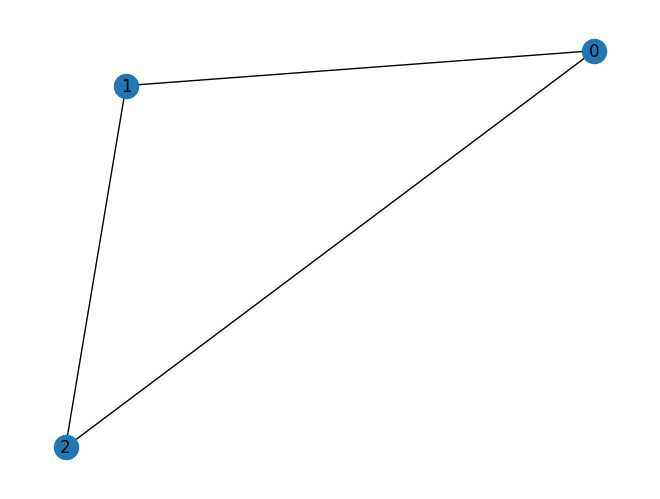

In [ ]:
# Draw the graph
nx.draw(G, with_labels = True)

## Node Degree and Neighbor

In [ ]:
node_id = 1

# Degree of node 1
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# Get neighbor of node 1
for neighbor in G.neighbors(node_id):
  print("Node {} has neighbor {}".format(node_id, neighbor))

Node 1 has degree 2
Node 1 has neighbor 0
Node 1 has neighbor 2


## Other Functionalities

NetworkX also provides plenty of useful methods to study graphs.

Here is an example to get [PageRank](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank) of nodes.

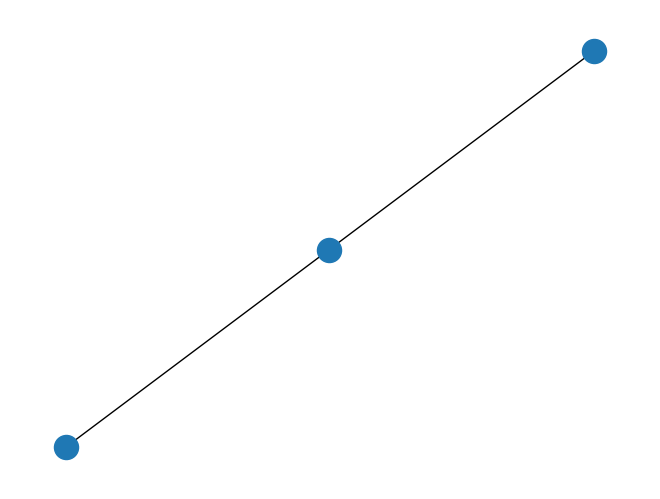

In [ ]:
nx.draw(nx.path_graph(num_nodes))

{0: 0.17857162031103999,
 1: 0.32142837968896,
 2: 0.32142837968896,
 3: 0.17857162031103999}

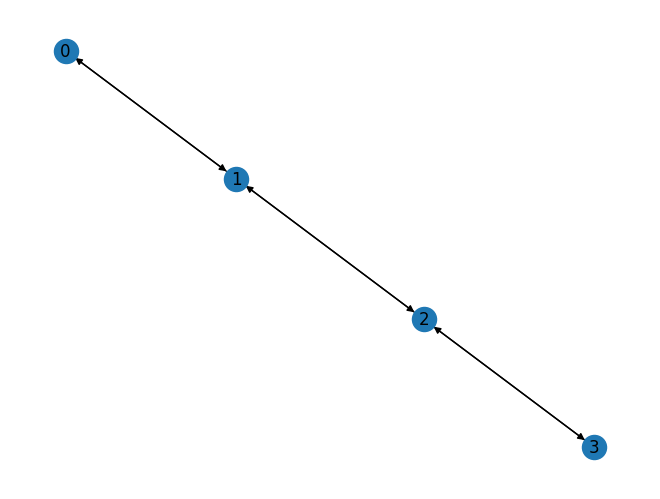

In [ ]:
num_nodes = 4
# Create a new path like graph and change it to a directed graph
G = nx.DiGraph(nx.path_graph(num_nodes))
nx.draw(G, with_labels = True)

# Get the PageRank
pr = nx.pagerank(G, alpha=0.8)
pr

## Documentation

You can explore more NetworkX functions through its [documentation](https://networkx.org/documentation/stable/).

# 2 Loading and basic computation on a Graph
To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.

## Setup
We will heavily use NetworkX in this Colab.

In [2]:
import networkx as nx

## Zachary's karate club network

The [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) is a graph which describes a social network of 34 members of a karate club and documents links between members who interacted outside the club.

In [2]:
G = nx.karate_club_graph()

# G is an undirected graph
type(G)

networkx.classes.graph.Graph

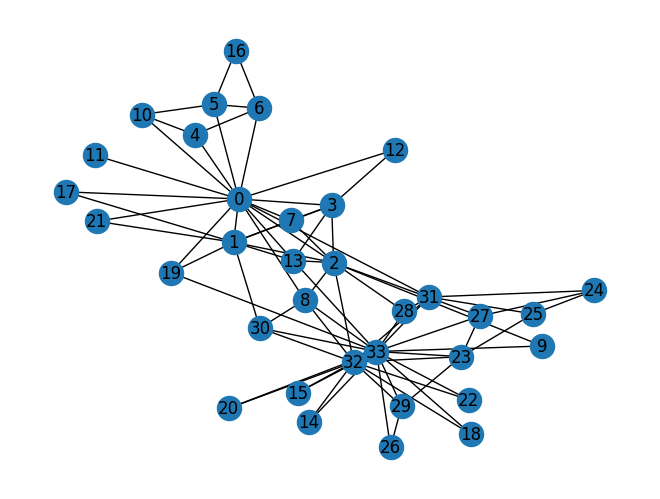

In [4]:
# Visualize the graph
nx.draw(G, with_labels = True)

## Question 1: What is the average degree of the karate club network?

In [5]:
def average_degree(num_edges, num_nodes):
    # Grado promedio = 2 * número de aristas / número de nodos
    avg_degree = round((2 * num_edges) / num_nodes)
    return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 5


## Question 2: What is the average clustering coefficient of the karate club network?

In [6]:
def average_clustering_coefficient(G):
    # Usa la función incorporada de networkx
    avg_cluster_coef = round(nx.average_clustering(G), 2)
    return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.57


## Question 3: What is the average PageRank value of the karate club network? What nodes are the most importants according to PageRank?



In [8]:
def pagerank_coefficient(G):
    # Calcula el PageRank de todos los nodos
    pagerank_dict = nx.pagerank(G)

    # Lista de coeficientes ordenada por ID de nodo
    list_pagerank_coef = [round(pagerank_dict[n], 4) for n in sorted(pagerank_dict.keys())]

    # Promedio
    avg_pagerank_coef = round(sum(pagerank_dict.values()) / len(pagerank_dict), 4)

    return list_pagerank_coef, avg_pagerank_coef

list_pageranks, avg_pagerank_coef = pagerank_coefficient(G)
print("Average PageRank value of karate club network is {}".format(avg_pagerank_coef))

Average PageRank value of karate club network is 0.0294


## Question 4: What is the (raw) closeness centrality for the karate club network node 5?

The equation for closeness centrality is $c(v) = \frac{1}{\sum_{u \neq v}\text{shortest path length between } u \text{ and } v}$

In [9]:
def closeness_centrality(G, node=5):
    closeness = round(nx.closeness_centrality(G, node), 2)
    return closeness

node = 5
closeness = closeness_centrality(G, node=node)
print("The node 5 has closeness centrality {}".format(closeness))

The node 5 has closeness centrality 0.38


## Question 5: Can you repeat these computings for any random graph?

For example, you can create an Erdős-Rényi graph of any size and degree with:



In [10]:
another_G = nx.fast_gnp_random_graph(n=20, p=0.3, seed=42, directed=False)  # 20 nodes, edge probability 0.3, directed or undirected

Or explore any other alternative for generating random graphs in NetworkX: https://networkx.org/documentation/stable/reference/generators.html

# 3 Node Embeddings




Graph Representation Learning consist on automatically learning node embeddings that represent the topological properties of the graph, i.e. the similarity between two nodes in the original graph is similar to the similarity of the representation of the nodes in the embedding space.

One way to compute the embeddings is with Random Walks (RWs). For this strategy, we rely on the well-known word2vec model by Google (A.K.A. Skip-gram model). This model was originally designed for NLP to learn continuos feature representations for words to predict nearby words. To apply skip-gram to a graph, we need a serialization strategy, and this is where Random Walks come into play.

First, we will use the [GENSIM](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py) implementation of the Word2Vec model. GENSIM is a well-know python library for Information Retrieval.

In [ ]:
# !pip install gensim

In [1]:
import networkx as nx
import random
from gensim.models import Word2Vec

Given a graph, for example the karate-club graph

In [3]:
# Step 1: choose a graph G
G   # currently, the karate-club graph, but replace this with any other graph

The core of this methodology is to define a serialization strategy of the graph based on random walks. For this, we can define a radom walk as a function:


In [4]:
# Step 2: Define random walk function
def random_walk(graph, start_node, walk_length=10):
    walk = [str(start_node)]  # Store nodes as strings for Word2Vec
    for _ in range(walk_length - 1):
        neighbors = list(graph.neighbors(int(walk[-1])))
        if not neighbors:
            break
        walk.append(str(random.choice(neighbors)))  # Randomly pick a neighbor
    return walk


This function defines a random walk on graph `graph` of lenght `walk_length` starting from node `start_node`. For this, the function picks one of the neighbours of the current node at random, appending this new node as the current node in the walk and repeating this process from this new node. Until the `walk_length` is reached. This is equivalent of a first-order Random Walk.

Please note that the previous random_walk function does not take into account node types or edge weights. Any neighbour of the current node can be visited next with equal probability.

However, only one RW is not enough to represent the whole graph. Also, the choice of the `start_node` would dramatically impact the results, since this starting node and its neighbour would be better represented in the resultant serialization than nodes which are far apart from this starting node. Therefore, we need to run many of these RWs with different starting nodes, i.e., we need to call the previous function in a loop:

In [ ]:
# Step 3: Generate multiple random walks
num_walks = 10  # Number of walks per node
walk_length = 5  # Length of each walk
walks = []

for node in G.nodes():
    for _ in range(num_walks):
        walks.append(random_walk(G, node, walk_length))

In the previous step, we are running `num_walks` RWs starting from every node of the original graph `G`and compiling all the walks in the variable `walks`.

This collection of walks is like a collection of sentences in a text. This is a serial representation or sampling of the graph.

In [6]:
walks

[['0', '13', '2', '27', '2'],
 ['0', '6', '5', '10', '0'],
 ['0', '3', '7', '2', '8'],
 ['0', '5', '0', '31', '28'],
 ['0', '13', '33', '15', '32'],
 ['0', '8', '32', '29', '33'],
 ['0', '31', '25', '23', '25'],
 ['0', '5', '0', '1', '13'],
 ['0', '6', '16', '5', '6'],
 ['0', '7', '2', '13', '33'],
 ['1', '0', '4', '0', '19'],
 ['1', '7', '0', '6', '4'],
 ['1', '21', '0', '13', '0'],
 ['1', '19', '33', '22', '33'],
 ['1', '7', '2', '27', '24'],
 ['1', '17', '0', '6', '16'],
 ['1', '19', '0', '31', '25'],
 ['1', '21', '1', '7', '2'],
 ['1', '19', '1', '17', '0'],
 ['1', '0', '4', '6', '0'],
 ['2', '32', '29', '23', '27'],
 ['2', '3', '1', '19', '0'],
 ['2', '13', '33', '13', '2'],
 ['2', '3', '0', '31', '33'],
 ['2', '32', '30', '33', '26'],
 ['2', '8', '30', '1', '0'],
 ['2', '13', '1', '17', '1'],
 ['2', '28', '33', '15', '33'],
 ['2', '7', '2', '0', '8'],
 ['2', '13', '1', '3', '0'],
 ['3', '13', '33', '30', '1'],
 ['3', '7', '1', '21', '0'],
 ['3', '13', '1', '19', '0'],
 ['3', '13'

We can now input this serialization into Word2Vec as it were sentences of text. We use the Word2Vec implementation from GENSIM imported above.


In [7]:
# Step 4: Train Word2Vec model (Skip-gram)
model = Word2Vec(sentences=walks, vector_size=128, window=2, sg=1, negative=5, min_count=1, workers=4)

The parameters of the Word2Vec are important and you can read more about them in the documentation: https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py

Briefly:
*   `vector_size`is the size of the resultant embedding we will get for the nodes
*   `window` defines the context size for the Skip-gram model, i.e. a positive instance is a pair of nodes that co-ocurr in a window of size `window` in any of the walks obtained. We use `2`for direct neighbours.
*    `negatives` specifies the number of negative samples for training
*    the `min_count=1` ensures that all nodes are included in the model
*    `workers` allows parallel processing
*    `sg` parameter enables the Skip-gram (SG) architecture (as opposed to `bg` for the continuous bag of words architecture-CBOW). The skip-gram model assumes that a word can be used to generate its surrounding words in a text sequence; while the continuous bag of words model assumes that a center word is generated based on its surrounding context words.


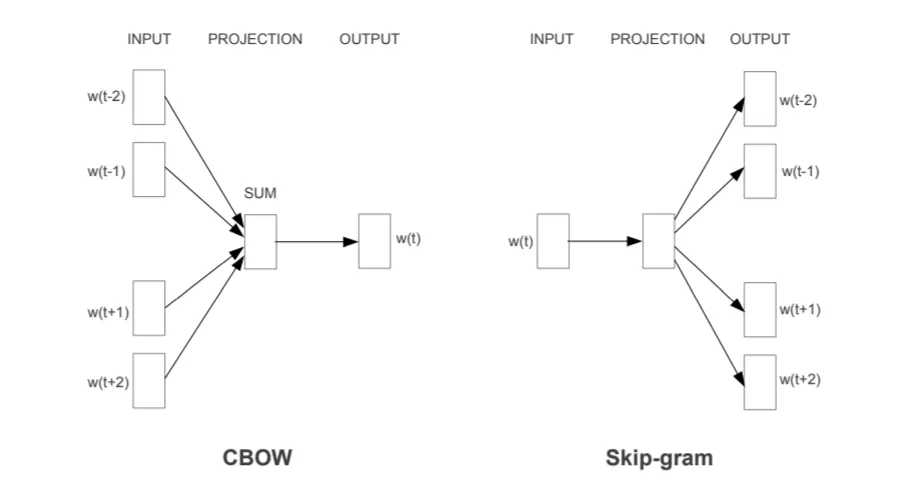


Source: https://arxiv.org/pdf/1309.4168v1.pdf



Once the model has been trained, we can extract the node embeddings from it

In [8]:
# Step 5: Extract node embeddings
node_embeddings = {node: model.wv[node] for node in model.wv.index_to_key}

These embeddings can be used as input to any ML algorithm you can think of for any supervised or unsupervised learning task

In [9]:

# Print sample embedding
sample_node = list(G.nodes())[0]
print(f"Embedding for node {sample_node}: {node_embeddings[str(sample_node)]}")


Embedding for node 0: [-0.00045598  0.00469748  0.01002783 -0.00414847 -0.00023414 -0.00602064
  0.00323298  0.00270717  0.00606786  0.00454483  0.00949741  0.00652615
  0.0062329  -0.00674173 -0.0071752  -0.00131341 -0.00136796  0.00718174
  0.00355311 -0.00123041  0.00262324  0.00264823  0.00757934 -0.00733754
 -0.0014294   0.00419461 -0.00154666  0.00692315  0.00828335  0.00406656
 -0.00290015  0.00698861 -0.00760965  0.00298423 -0.00493823 -0.00353527
  0.00546618  0.00506553  0.00817168 -0.005059    0.00599128  0.0063714
 -0.00312961 -0.00809649  0.0047578   0.00527474 -0.00017002 -0.0072287
 -0.00577813 -0.00165337  0.00451034 -0.0028267  -0.00589491  0.00476024
  0.00494793 -0.00489782  0.00213985 -0.00181429 -0.00119067 -0.00842989
  0.00388031 -0.00501228  0.00131659 -0.00080862  0.00309169 -0.00735888
 -0.00153864  0.00268595  0.00400148 -0.0028911  -0.00605066  0.00363053
 -0.0013951   0.00240073 -0.00537925 -0.00158395  0.00599735  0.00570515
 -0.00337706  0.00413752 -0.006

We can plot these data using 2D projections of the embeddings, for example with t-SNE ((https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)):

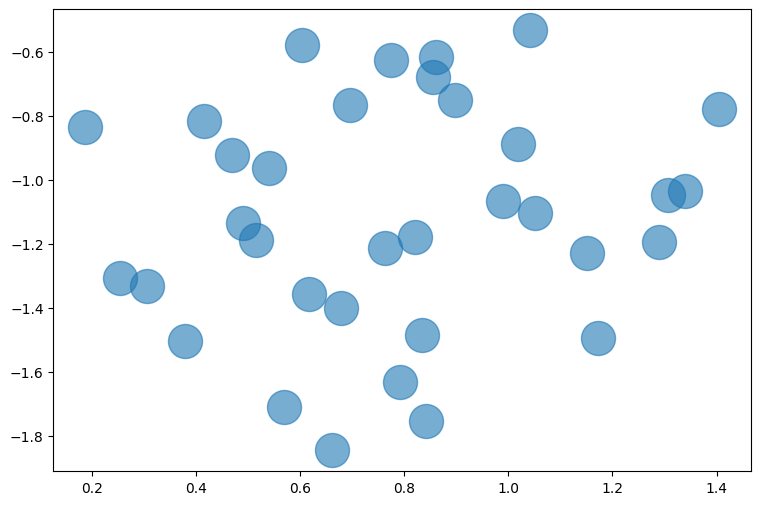

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# transform the embeddings from 128 dimensions to 2D space
m = TSNE(learning_rate=20, random_state=42)
tsne_features = m.fit_transform(np.array(list(node_embeddings.values())))


# plot the transformed embeddings
plt.figure(figsize=(9,6))
plt.scatter(x = tsne_features[:,0],
            y = tsne_features[:,1],
            s =600,
            alpha=0.6)

The karate club network represents a network about to split in two different subnetworks. Can you identify these two communities? and their corresponding leaders?

We will accomplish this task later. But for now, the nodes in the graph are already labelled with an attribute `club`, indicating the two groups that arose after the argument. One group is labelled after `Officer` and the other is labelled after `Mr. Hi` (depending on each group's leader). We can label these two groups to understand whether the reduced representation of the embeddings help in the discrimination of the two groups.

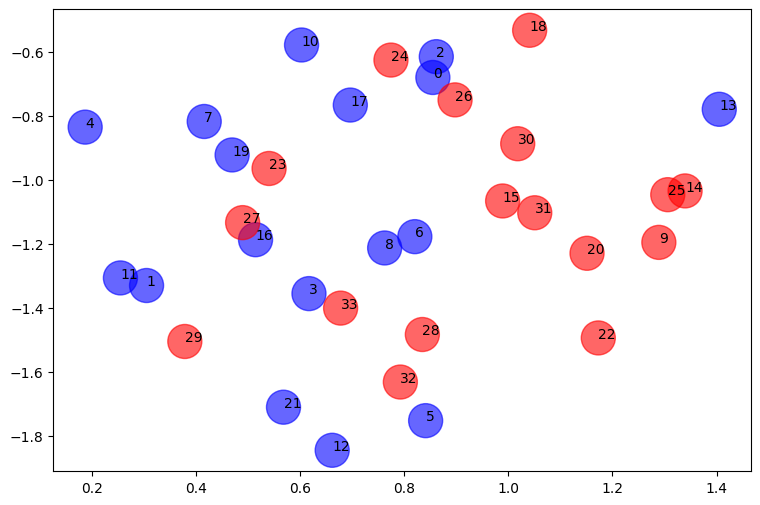

In [11]:
# retrieve the labels for each node
labels = np.asarray([G.nodes[i]['club'] != 'Mr. Hi' for i in G.nodes]).astype(np.int64)

# assigning colours to node labels
color_map = []
for i in labels:
    if i == 0:
        color_map.append('blue')
    else:
        color_map.append('red')


# plot the transformed embeddings
plt.figure(figsize=(9,6))
plt.scatter(x = tsne_features[:,0],
            y = tsne_features[:,1],
            c = color_map,
            s =600,
            alpha=0.6)
# adds annotations
for i, label in enumerate(np.arange(0,34)):
    plt.annotate(label, (tsne_features[:,0][i], tsne_features[:,1][i]))

Can you change the parameters of the embedding algorithm to get an embedding able to discriminate between the two groups?


As we have shown in the lecture, it is also possible to run 2nd order random walks to better control the definition of neighbourhood for our nodes.

Implementations of 2nd order RWs are available here: https://github.com/eliorc/node2vec .

Briefly, we install a python library called `node2vec` and run the following code:

In [ ]:
# pip install node2vec

In [12]:
from node2vec import Node2Vec
# Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
node2vec = Node2Vec(G, dimensions=64, walk_length=5, num_walks=20, workers=4, p=11, q=0.01)

# Embed nodes
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)

c:\Users\Pablo\OneDrive\Documentos\Estudios\DATCOM\Trabajo Fin de Máster\App\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Computing transition probabilities: 100%|██████████| 34/34 [00:00<00:00, 5458.62it/s]


We extract the embeddings from the model:

In [13]:
node_embeddings = {node: model.wv[node] for node in model.wv.index_to_key}


and plot the t-SNE of these embeddings again:

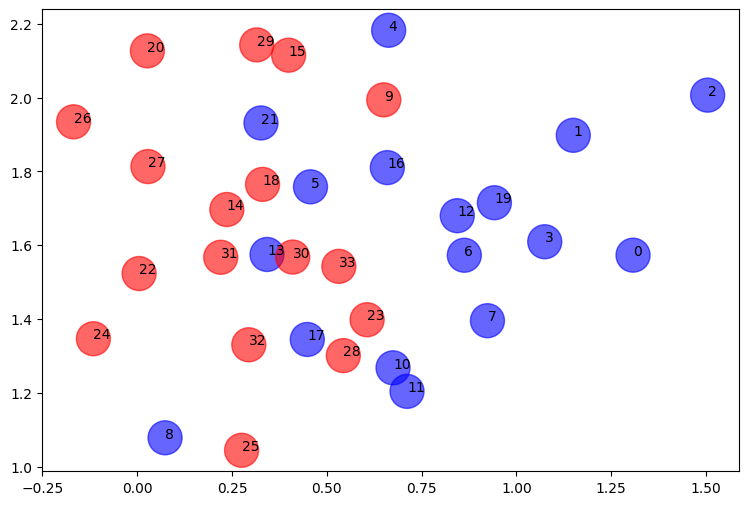

In [14]:

# transform the embeddings from 128 dimensions to 2D space
m = TSNE(learning_rate=20, random_state=42)
tsne_features = m.fit_transform(np.array(list(node_embeddings.values())))


# plot the transformed embeddings
plt.figure(figsize=(9,6))
plt.scatter(x = tsne_features[:,0],
            y = tsne_features[:,1],
            c = color_map,
            s =600,
            alpha=0.6)
# adds annotations
for i, label in enumerate(np.arange(0,34)):
    plt.annotate(label, (tsne_features[:,0][i], tsne_features[:,1][i]))


After a visual inspection of the embeddings. What do you think?

Actually, there would be two ways to evaluate the quality of the embeddings, both ways depending on the final task to be accomplished:
1. A direct evaluation based on some metric. For example, we could check if the distance of the nodes in the original space (the graph) is similar to their distance in the embedding space.
2. An indirect evaluation based on the quality of the results of downstream analyses. For example, if the embeddings are to be used as input for a classification or clustering algorithm, the quality of the results obtained by these downstream tools would indirectly depend on the quality of the embeddings.

In [ ]:
from sklearn.metrics import mean_squared_error

# Obtener distancias reales en el grafo (usamos solo pares conectados)
real_distances = []
embedding_distances = []

for u, v in G.edges():
    try:
        # Distancia más corta en el grafo
        real = nx.shortest_path_length(G, u, v)

        # Distancia en el espacio embebido
        emb_u = tsne_features[u]
        emb_v = tsne_features[v]
        embed = np.linalg.norm(emb_u - emb_v)

        real_distances.append(real)
        embedding_distances.append(embed)
    except:
        continue

# Evaluación: ¿cuánto se parecen?
mse = mean_squared_error(real_distances, embedding_distances)
print(f"Error cuadrático medio entre distancias del grafo y del embedding: {round(mse, 4)}")

Error cuadrático medio entre distancias del grafo y del embedding: 0.2602


## TASKS FOR CLASS




### COMMUNITY DETECTION AND VISUALIZATION



Use your preferred R or Python libraries to perform a community detection on the karate-club network using clustering algorithms starting from the RW embeddings. The following will be assessed:
- Test different parameter configuration for the RW embedding (number of walks, length, p and q for the 2nd order RW, etc).
- The use of different clustering algorithms.
- The use of different distance measures.
- The visualization of the resulting groups to justify the obtained communities. You can explore the use of t-SNE, PCA or UMAP for projecting the embeddings into a 2-D plot.


Generating walks (CPU: 1): 100%|██████████| 20/20 [00:00<00:00, 800.05it/s]


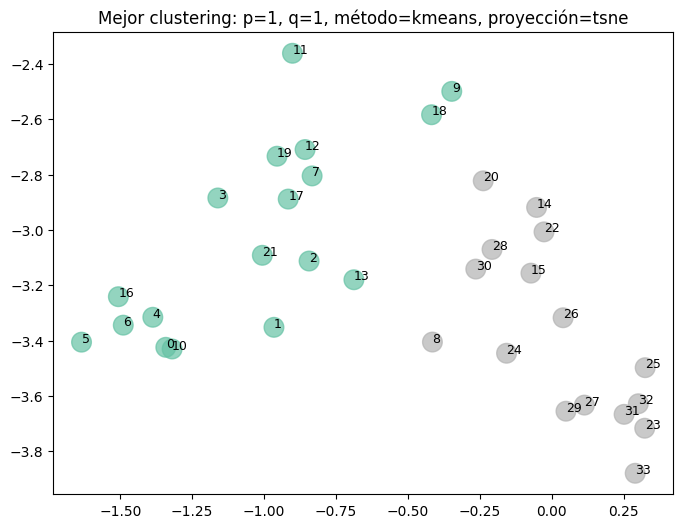

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from node2vec import Node2Vec
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.metrics import pairwise_distances

# Grafo base
G = nx.karate_club_graph()
true_labels = [0 if G.nodes[n]['club'] == 'Mr. Hi' else 1 for n in G.nodes()]

# Parámetros a probar
param_sets = [
    {'p': 1, 'q': 1},
    {'p': 0.25, 'q': 2},
    {'p': 4, 'q': 0.25}
]

results = []

# Función de clustering
def cluster_embeddings(X, method="kmeans", metric="euclidean"):
    if method == "kmeans":
        model = KMeans(n_clusters=2, random_state=42)
        labels = model.fit_predict(X)
    elif method == "dbscan":
        model = DBSCAN(eps=0.5, min_samples=2, metric=metric)
        labels = model.fit_predict(X)
    elif method == "agglo":
        labels = AgglomerativeClustering(n_clusters=2, affinity=metric, linkage='average').fit_predict(X)
    return labels

# Función de proyección
def project_embeddings(X, method="tsne"):
    if method == "tsne":
        return TSNE(random_state=42).fit_transform(X)
    elif method == "pca":
        return PCA(n_components=2).fit_transform(X)
    elif method == "umap":
        return umap.UMAP(random_state=42).fit_transform(X)

# Iterar sobre combinaciones
for params in param_sets:
    node2vec = Node2Vec(G, dimensions=64, walk_length=10, num_walks=20, workers=1,
                        p=params['p'], q=params['q'])
    model = node2vec.fit(window=10, min_count=1, batch_words=4)
    embeddings = np.array([model.wv[str(n)] for n in G.nodes()])
    
    for method in ["kmeans", "dbscan", "agglo"]:
        for metric in ["euclidean", "cosine"]:
            try:
                labels = cluster_embeddings(embeddings, method=method, metric=metric)
                silhouette = silhouette_score(embeddings, labels, metric=metric) if len(set(labels)) > 1 else -1
                ari = adjusted_rand_score(true_labels, labels) if len(set(labels)) > 1 else -1

                for proj_method in ["tsne", "pca", "umap"]:
                    projected = project_embeddings(embeddings, method=proj_method)
                    results.append({
                        'p': params['p'], 'q': params['q'],
                        'clustering': method,
                        'distance': metric,
                        'projection': proj_method,
                        'silhouette': round(silhouette, 3),
                        'ari': round(ari, 3),
                        'projected': projected,
                        'labels': labels
                    })
            except Exception as e:
                continue

# Mostrar resultados ordenados
df_results = pd.DataFrame([{k: v for k, v in r.items() if k not in ['projected', 'labels']} for r in results])
df_results = df_results.sort_values(by='ari', ascending=False).reset_index(drop=True)

df_results.head(10)

# Mostrar visualización del mejor resultado
best = results[0]
plt.figure(figsize=(8,6))
plt.scatter(best['projected'][:,0], best['projected'][:,1], c=best['labels'], cmap="Set2", s=200, alpha=0.7)
for i, txt in enumerate(G.nodes()):
    plt.annotate(txt, (best['projected'][i,0], best['projected'][i,1]), fontsize=9)
plt.title(f"Mejor clustering: p={best['p']}, q={best['q']}, método={best['clustering']}, proyección={best['projection']}")
plt.show()






---



# Assignment

You are asked to run different Graph Representation Learning (GRL) algorithms based on Random Walks (RWs) for obtaining embeddings of a biomedical network and perform further downstream ML analyses on the obtained embeddings using clustering and classification algorithms.

## Description of the network

In this study, a co-authorship network has been constructed from researchers at the Instituto de Parasitología y Biomedicina López-Neyra (IPBLN-CSIC). The network represents the scientific collaborations between authors, using the shared publication records as a basis.

Each node of the network represents an individual author belonging to the IPBLN. The nodes contain two key attributes:

- label: corresponds to the name of the researcher (format “Last name, First name”).
- department: indicates the author's department of assignment within the IPBLN, having been classified into three main areas:
    - Molecular biology
    - Cell biology and immunology
    - Biochemistry and molecular pharmacology

The edges of the graph indicate co-authorship relationships between pairs of researchers, i.e., collaboration reflected in at least one joint publication. These edges are weighted by the total number of publications shared between the authors, stored in the weight attribute. The higher the weight, the more collaborations there have been between the two researchers.

To focus on the most relevant relationships, we extracted the giant connected component of the graph, i.e., the largest subset of nodes interconnected with each other through some sequence of co-authorships. This allows us to analyze the main structure of collaboration within the institute, excluding small or isolated components.

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# === 1. CARGAR DATOS ===
nodos = pd.read_csv("../data/datasets/departamentos_todos_autores.csv")
enlaces = pd.read_csv("../data/networks/coautorias_IPBLN.csv")

# === 2. CONSTRUIR GRAFO ===
G = nx.Graph()

# Añadir nodos (opcional si edges ya los crea)
for _, row in nodos.iterrows():
    G.add_node(row["author_id"], label=row["Label"], departament=row["departamento"])  # puedes añadir más atributos si quieres

# Añadir aristas ponderadas
for _, row in enlaces.iterrows():
    G.add_edge(row["Source"], row["Target"], weight=row["Weight"])

# Componente gigante
Gcc = max(nx.connected_components(G), key=len)
G_sub = G.subgraph(Gcc).copy()

num_nodes = G_sub.number_of_nodes()
print("G has {} nodes".format(num_nodes))
num_edges = G_sub.number_of_edges()
print("G has {} edges".format(num_edges))

G has 635 nodes
G has 3448 edges


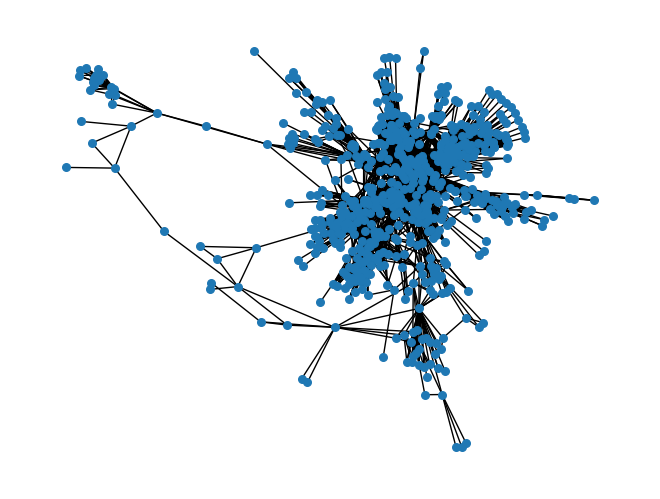

In [18]:
nx.draw(G_sub, with_labels = False, node_size= 30)

## Description of the tasks for the assigment

### TASK 1: GRL
Compute the node embeddings for the IPBLN network using RWs following the methodologies proposed in the previous code. The following aspects will be evaluated:
- Use of RWs and 2nd order RWs.
- Experimentation for the parameter setting (walk length, number of walks, size of the embedding, p, q, etc).
- The visualization of the resulting embeddings for visual inspection prior to other downstream ML tasks. You can explore the use of t-SNE, PCA or UMAP for projecting the embeddings into a 2-D plot.

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin

class Node2VecTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, dimensions=64, walk_length=30, num_walks=100, p=1.0, q=1.0):
        self.dimensions = dimensions
        self.walk_length = walk_length
        self.num_walks = num_walks
        self.p = p
        self.q = q
        self.embeddings_ = {}

    def fit(self, X, y=None):
        # X is a list of node_ids (str or int)
        node2vec = Node2Vec(
            G_sub,
            dimensions=self.dimensions,
            walk_length=self.walk_length,
            num_walks=self.num_walks,
            p=self.p,
            q=self.q,
            workers=2,
            weight_key='weight'
        )
        model = node2vec.fit(window=10, min_count=1)
        self.embeddings_ = {str(n): model.wv[str(n)] for n in G_sub.nodes() if str(n) in model.wv}
        return self

    def transform(self, X):
        return np.array([self.embeddings_.get(str(n), np.zeros(self.dimensions)) for n in X])


===> Parámetros: dimensions=32, walk_length=10, num_walks=50, p=1.0, q=1.0


Computing transition probabilities: 100%|██████████| 635/635 [00:00<00:00, 1063.63it/s]


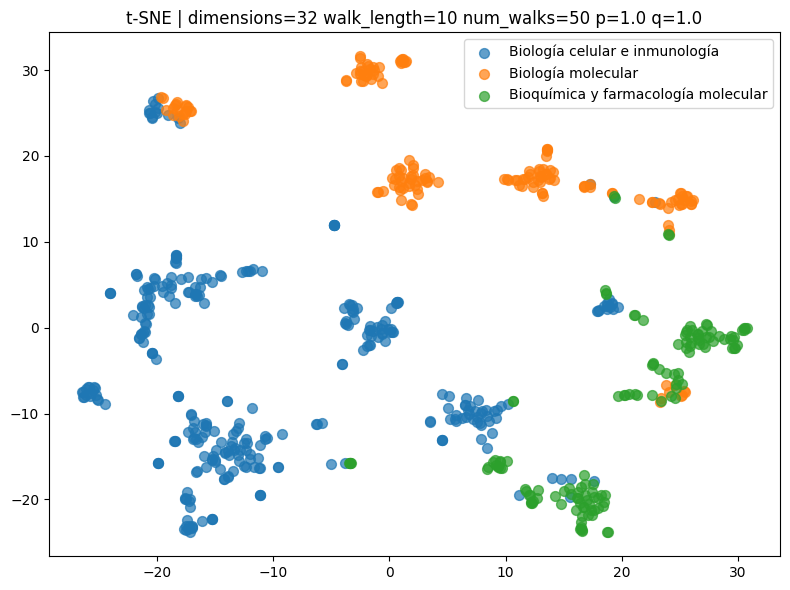

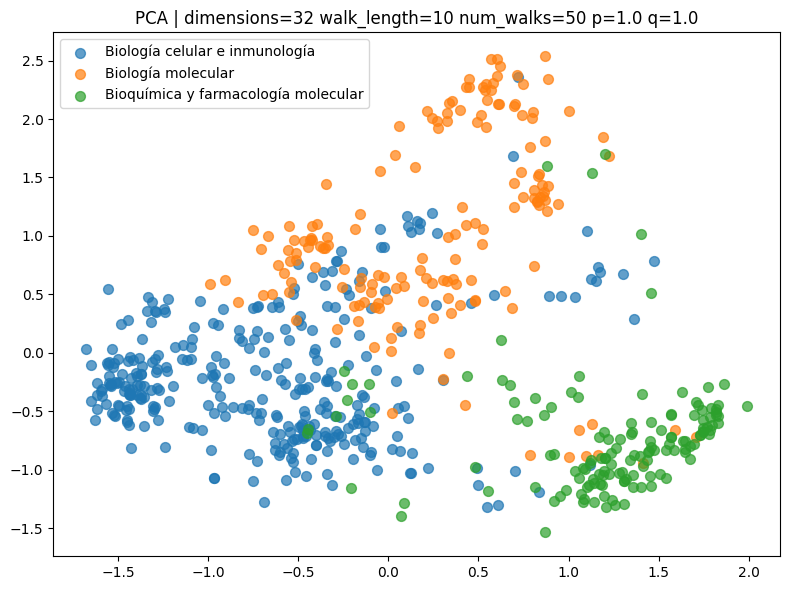


===> Parámetros: dimensions=32, walk_length=20, num_walks=100, p=0.5, q=2.0


Computing transition probabilities: 100%|██████████| 635/635 [00:00<00:00, 1036.84it/s]


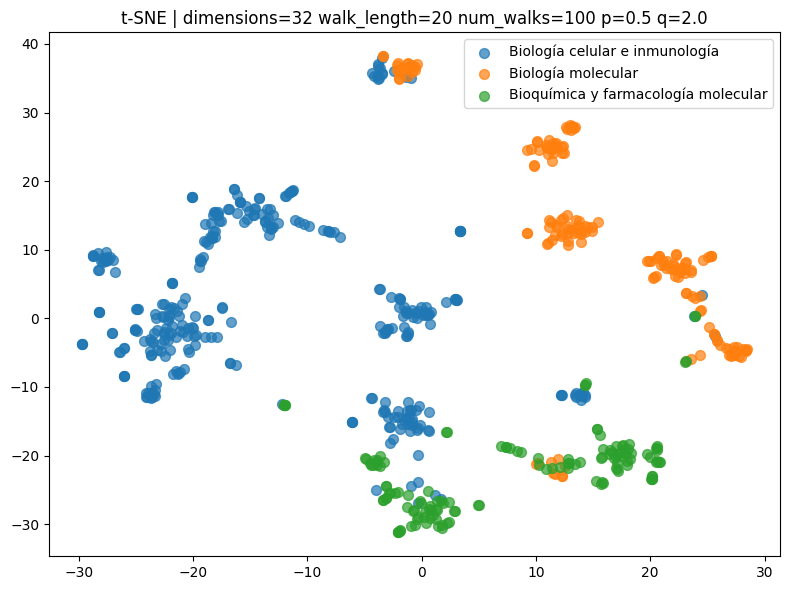

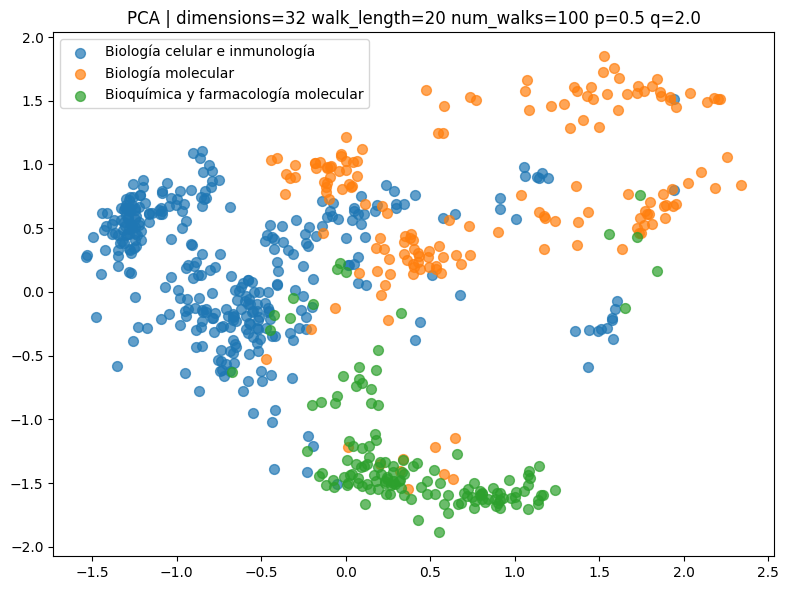


===> Parámetros: dimensions=32, walk_length=20, num_walks=100, p=2.0, q=0.5


Computing transition probabilities: 100%|██████████| 635/635 [00:00<00:00, 1118.83it/s]


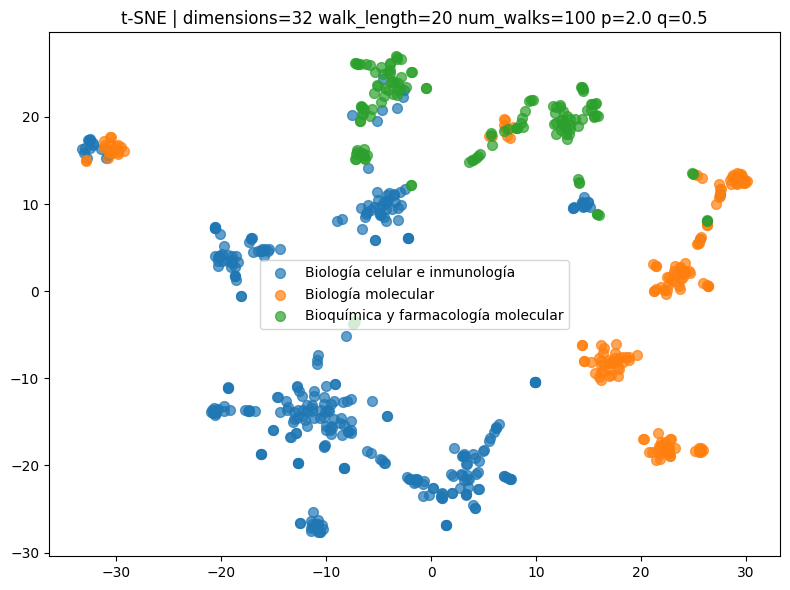

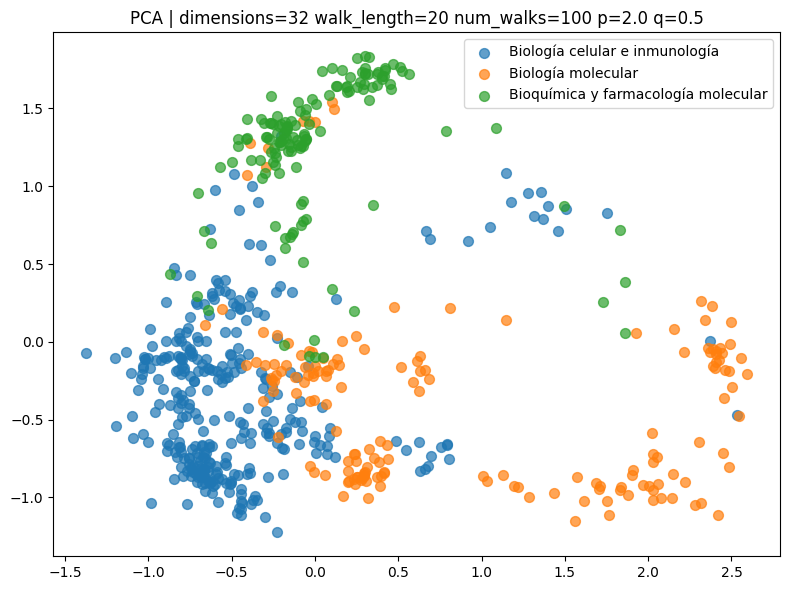


===> Parámetros: dimensions=32, walk_length=30, num_walks=100, p=1.0, q=0.5


Computing transition probabilities: 100%|██████████| 635/635 [00:00<00:00, 1121.32it/s]


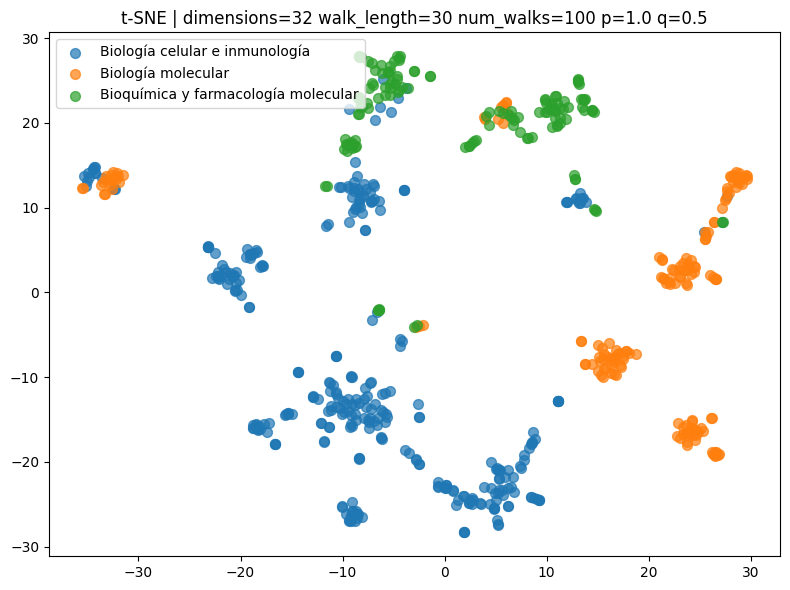

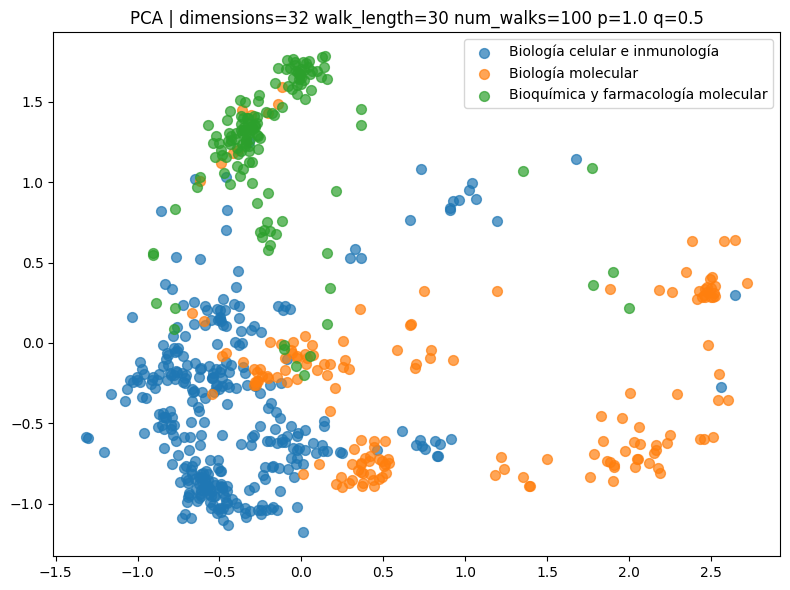


===> Parámetros: dimensions=64, walk_length=10, num_walks=50, p=1.0, q=1.0


Computing transition probabilities: 100%|██████████| 635/635 [00:00<00:00, 1036.25it/s]


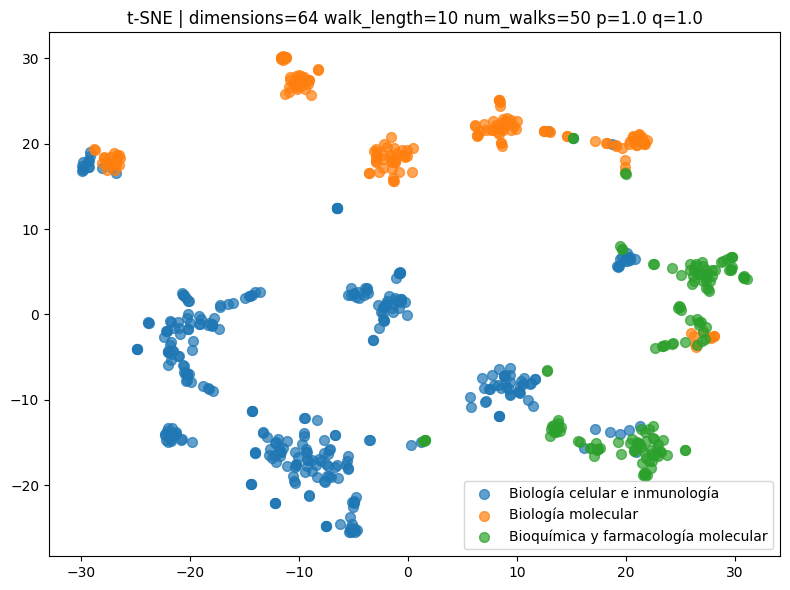

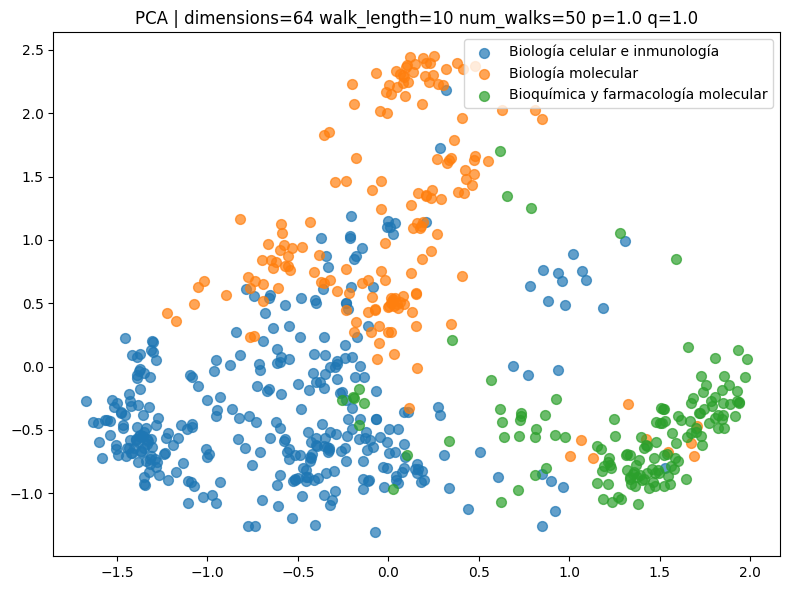


===> Parámetros: dimensions=64, walk_length=20, num_walks=100, p=0.5, q=2.0


Computing transition probabilities: 100%|██████████| 635/635 [00:00<00:00, 1011.65it/s]


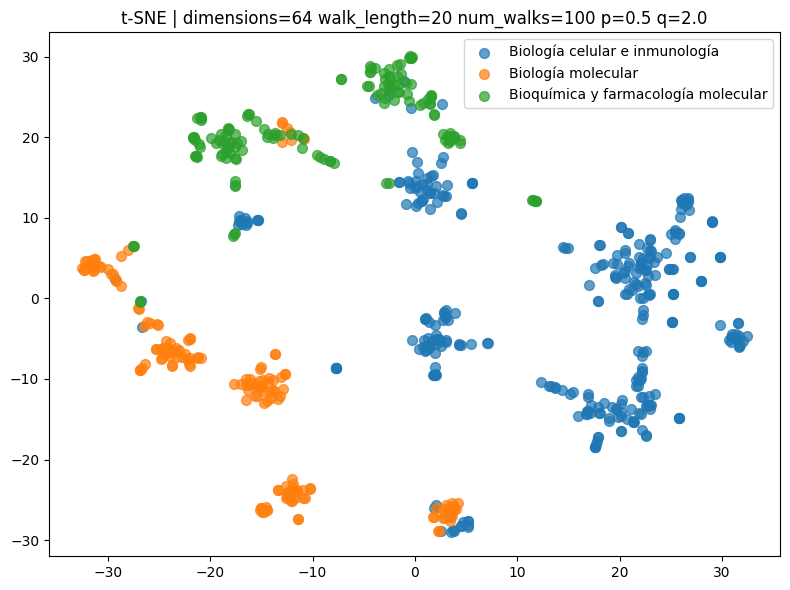

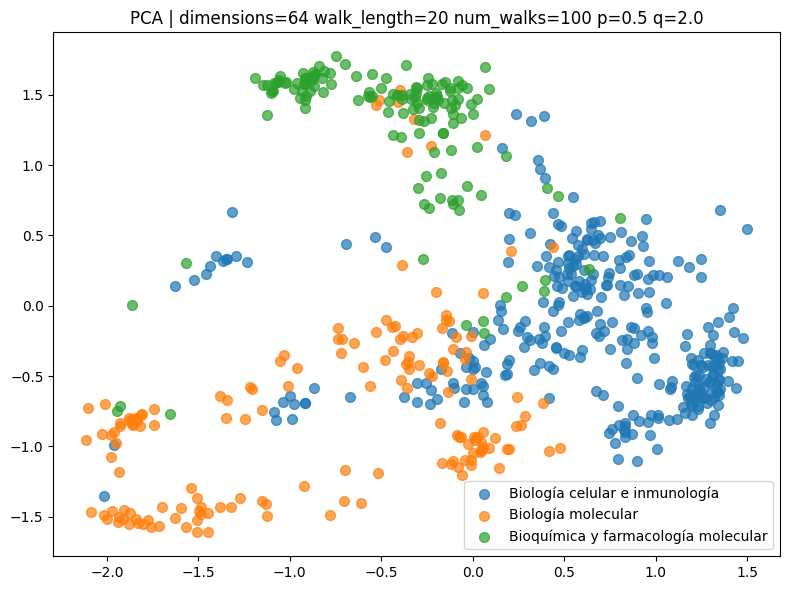


===> Parámetros: dimensions=64, walk_length=20, num_walks=100, p=2.0, q=0.5


Computing transition probabilities: 100%|██████████| 635/635 [00:00<00:00, 1145.50it/s]


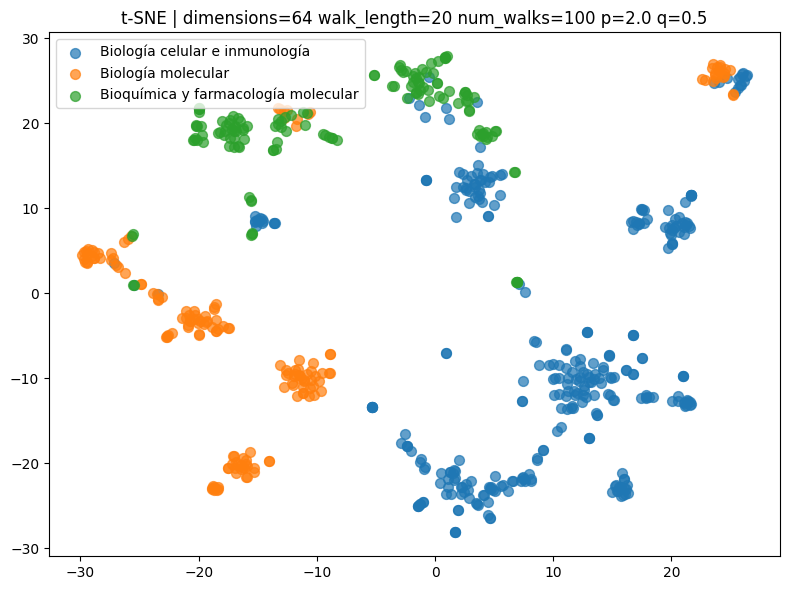

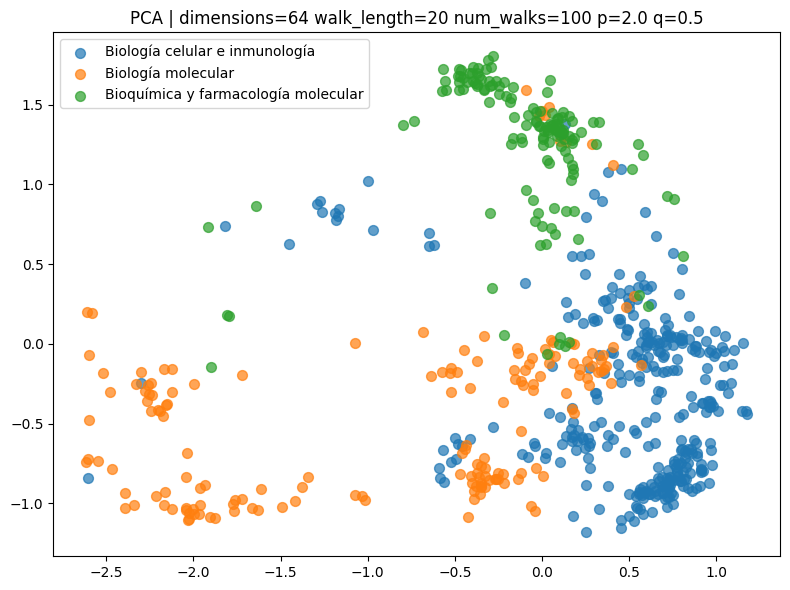


===> Parámetros: dimensions=64, walk_length=30, num_walks=100, p=1.0, q=0.5


Computing transition probabilities: 100%|██████████| 635/635 [00:00<00:00, 1199.87it/s]


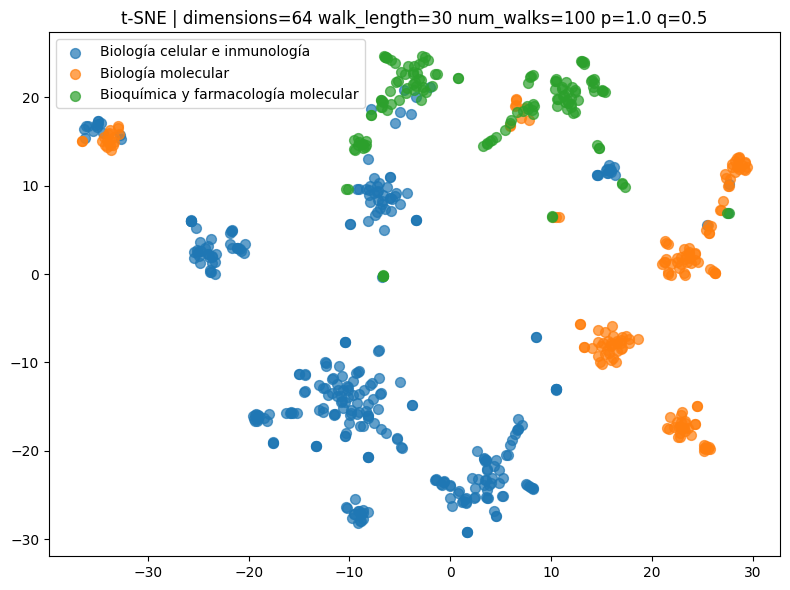

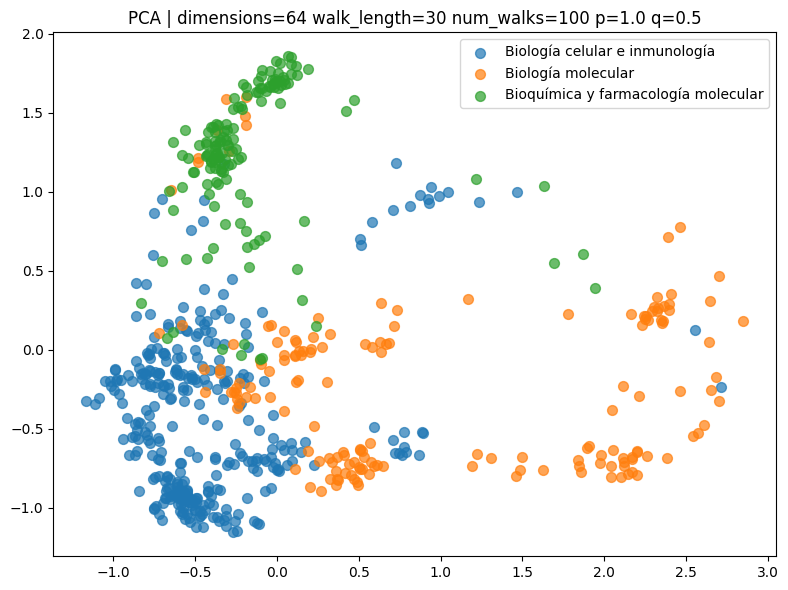


===> Parámetros: dimensions=128, walk_length=20, num_walks=100, p=1.0, q=1.0


Computing transition probabilities: 100%|██████████| 635/635 [00:00<00:00, 1254.49it/s]


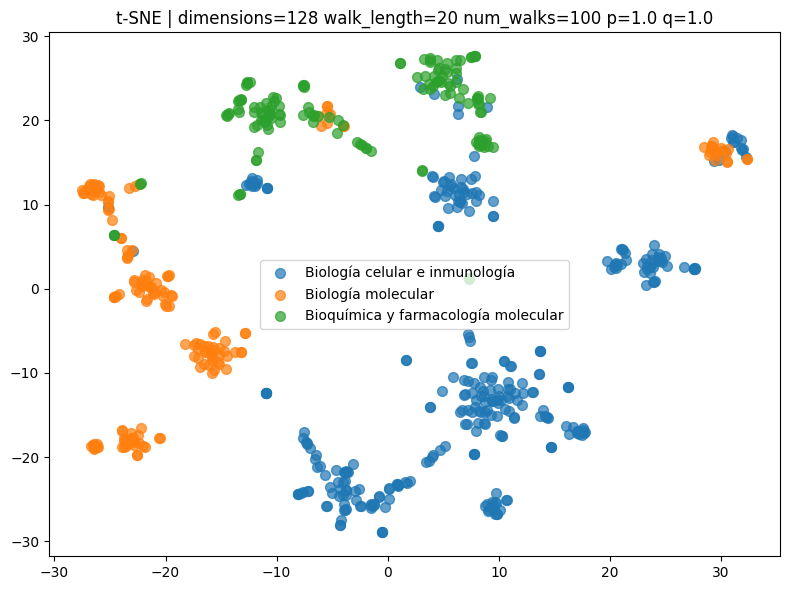

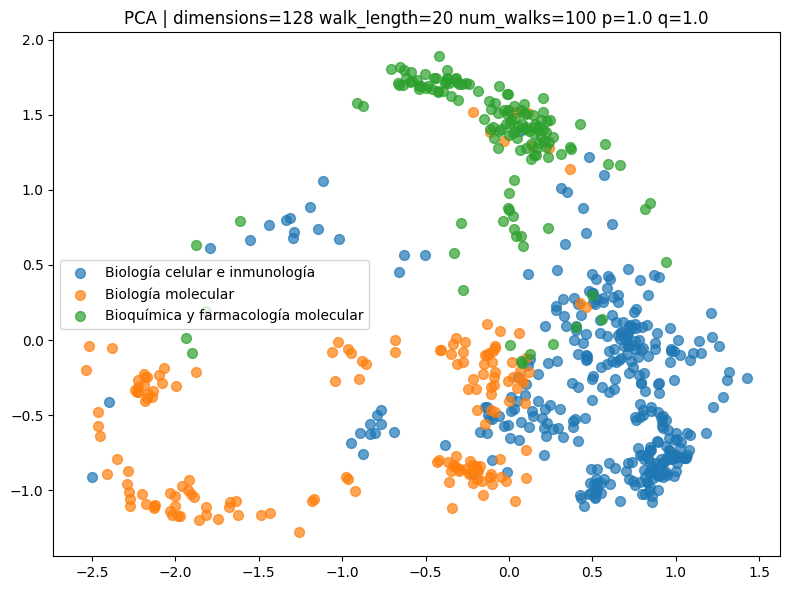


===> Parámetros: dimensions=128, walk_length=30, num_walks=100, p=0.25, q=2.0


Computing transition probabilities: 100%|██████████| 635/635 [00:00<00:00, 1079.46it/s]


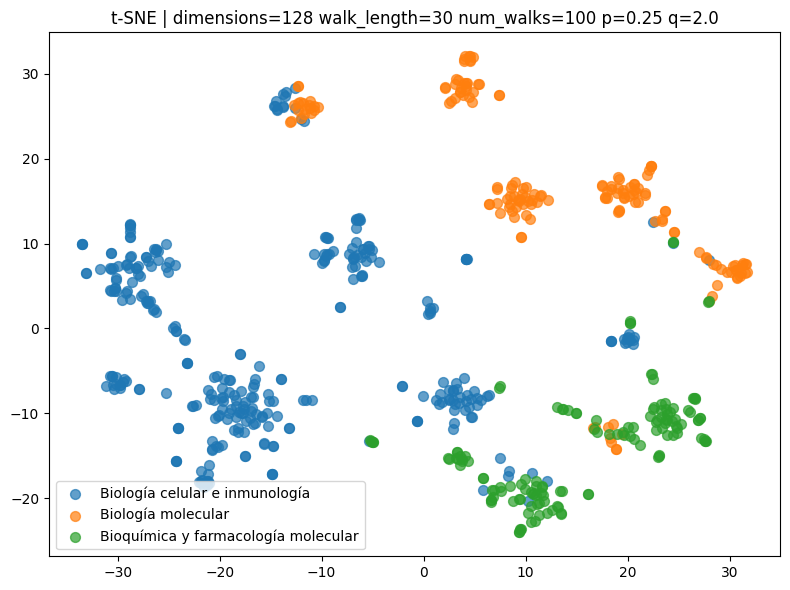

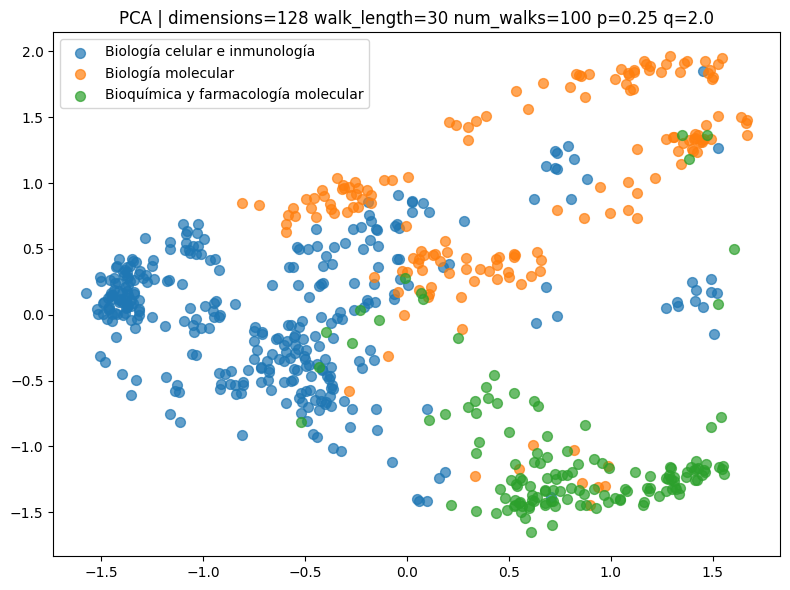

In [29]:
param_sets = [
    {"dimensions": 32, "walk_length": 10, "num_walks": 50,  "p": 1.0, "q": 1.0},
    {"dimensions": 32, "walk_length": 20, "num_walks": 100, "p": 0.5, "q": 2.0},
    {"dimensions": 32, "walk_length": 20, "num_walks": 100, "p": 2.0, "q": 0.5},
    {"dimensions": 32, "walk_length": 30, "num_walks": 100, "p": 1.0, "q": 0.5},

    {"dimensions": 64, "walk_length": 10, "num_walks": 50,  "p": 1.0, "q": 1.0},
    {"dimensions": 64, "walk_length": 20, "num_walks": 100, "p": 0.5, "q": 2.0},
    {"dimensions": 64, "walk_length": 20, "num_walks": 100, "p": 2.0, "q": 0.5},
    {"dimensions": 64, "walk_length": 30, "num_walks": 100, "p": 1.0, "q": 0.5},

    {"dimensions": 128, "walk_length": 20, "num_walks": 100, "p": 1.0, "q": 1.0},
    {"dimensions": 128, "walk_length": 30, "num_walks": 100, "p": 0.25, "q": 2.0},
]


# Nodos ordenados
sorted_nodes = sorted(G_sub.nodes())

# Extraer etiquetas reales (departamento)
labels = [G_sub.nodes[n]["departament"] for n in sorted_nodes]

# Iterar sobre cada configuración
for i, params in enumerate(param_sets):
    print(f"\n===> Parámetros: dimensions={params['dimensions']}, walk_length={params['walk_length']}, num_walks={params['num_walks']}, p={params['p']}, q={params['q']}")

    # Inicializar el transformer
    transformer = Node2VecTransformer(
        dimensions=params["dimensions"],
        walk_length=params["walk_length"],
        num_walks=params["num_walks"],
        p=params["p"],
        q=params["q"]
    )

    # Ajustar y transformar
    transformer.fit(sorted_nodes)
    X_embedded = transformer.transform(sorted_nodes)

    # === Visualización con t-SNE ===
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_embedded)

    plt.figure(figsize=(8,6))
    for dept in set(labels):
        idx = [i for i, l in enumerate(labels) if l == dept]
        plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], label=dept, alpha=0.7, s=50)
    plt.title(f"t-SNE | dimensions={params['dimensions']} walk_length={params['walk_length']} num_walks={params['num_walks']} p={params['p']} q={params['q']}")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # === Visualización con PCA ===
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_embedded)

    plt.figure(figsize=(8,6))
    for dept in set(labels):
        idx = [i for i, l in enumerate(labels) if l == dept]
        plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=dept, alpha=0.7, s=50)
    plt.title(f"PCA | dimensions={params['dimensions']} walk_length={params['walk_length']} num_walks={params['num_walks']} p={params['p']} q={params['q']}")
    plt.legend()
    plt.tight_layout()
    plt.show()

Se ha probado la representación de los embeddings en 2 dimensiones con TSNE y PCA para distintas configuraciones de parámetros del node2vec. En general, parece que con TSNE obtenemos representaciones más claras, en cuanto a las mejores configuraciones de parámetros del node2vec sacaremos conclusiones en los análisis posteriores.

### TASK 2: CLUSTERING
Use your preferred R or Python libraries to perform a clustering analysis on the embeddings for the disease network. The following aspects will be evaluated:

- Evaluation of the clustering results for different embeddings (RWs and 2nd order RWs, different setting of parameters, etc)
- Use of different clustering algorithms: k-means, hierarchical clustering, etc.
- Use of different distance metrics.
- Use of metrics to estimate the optimal number of clusters (Silhouette Index, Calinski-Harabasz, etc.).
- Visualization and metrics on the the resulting groups using the node labels to evaluate the results.

Procesando configuración: p=1.0, q=1.0, walk_length=10


Computing transition probabilities: 100%|██████████| 635/635 [00:00<00:00, 1002.42it/s]


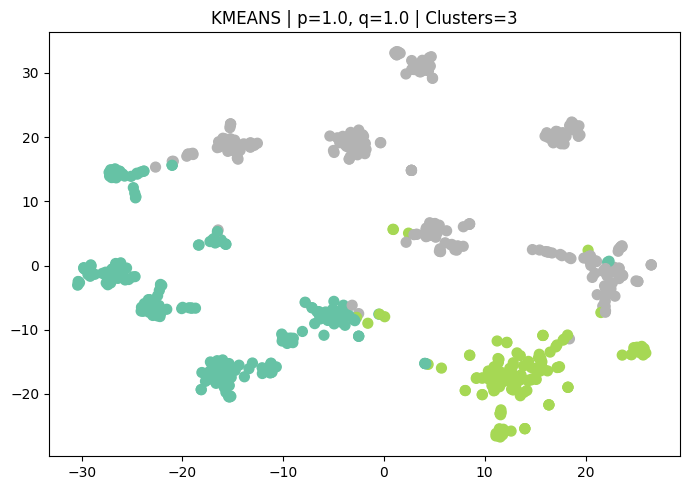

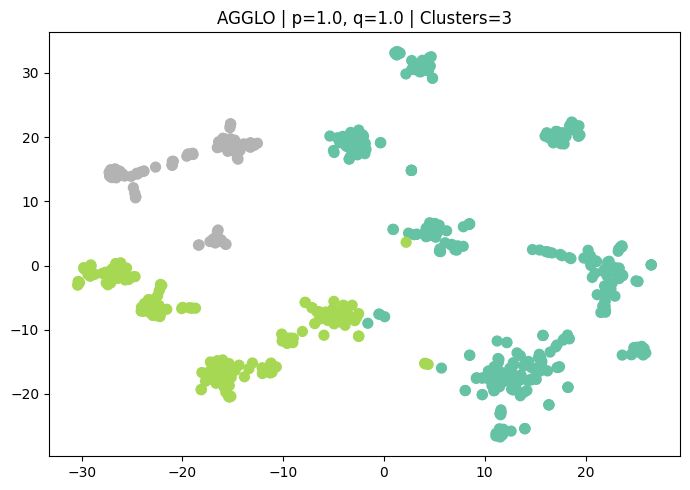

c:\Users\Pablo\OneDrive\Documentos\Estudios\DATCOM\Trabajo Fin de Máster\App\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Pablo\OneDrive\Documentos\Estudios\DATCOM\Trabajo Fin de Máster\App\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


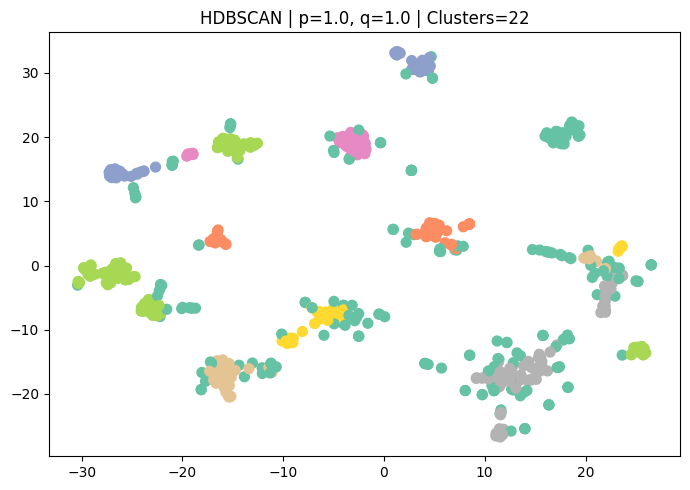

Procesando configuración: p=0.5, q=2.0, walk_length=20


Computing transition probabilities: 100%|██████████| 635/635 [00:00<00:00, 1286.43it/s]


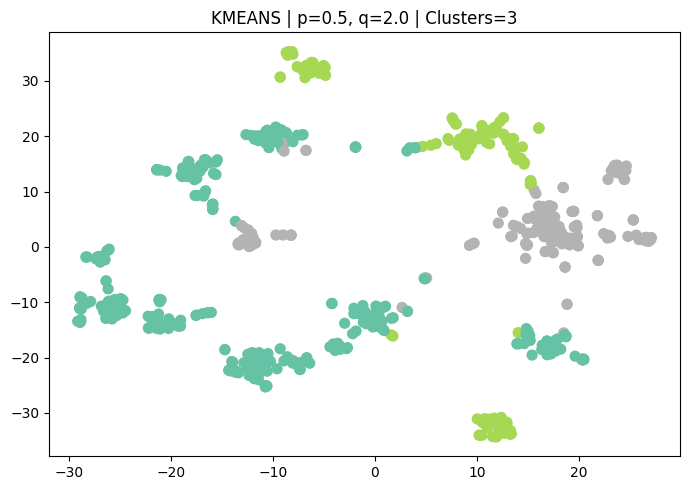

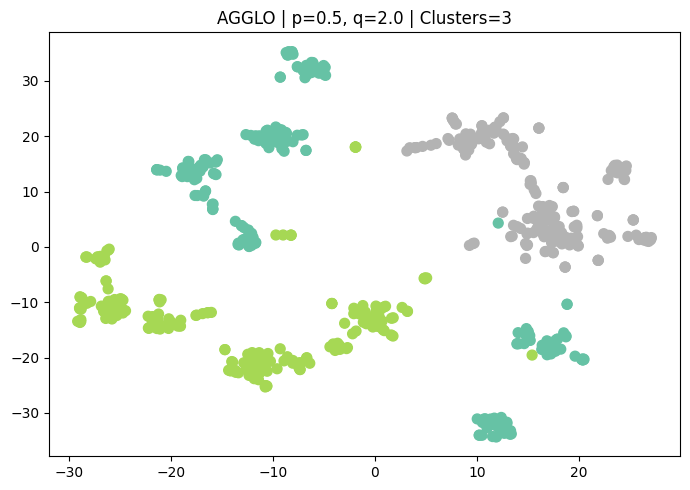

c:\Users\Pablo\OneDrive\Documentos\Estudios\DATCOM\Trabajo Fin de Máster\App\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Pablo\OneDrive\Documentos\Estudios\DATCOM\Trabajo Fin de Máster\App\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


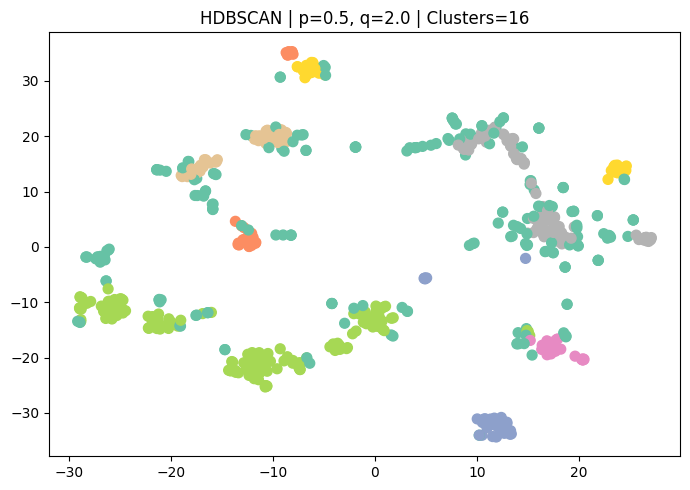

Procesando configuración: p=2.0, q=0.5, walk_length=20


Computing transition probabilities: 100%|██████████| 635/635 [00:00<00:00, 1142.17it/s]


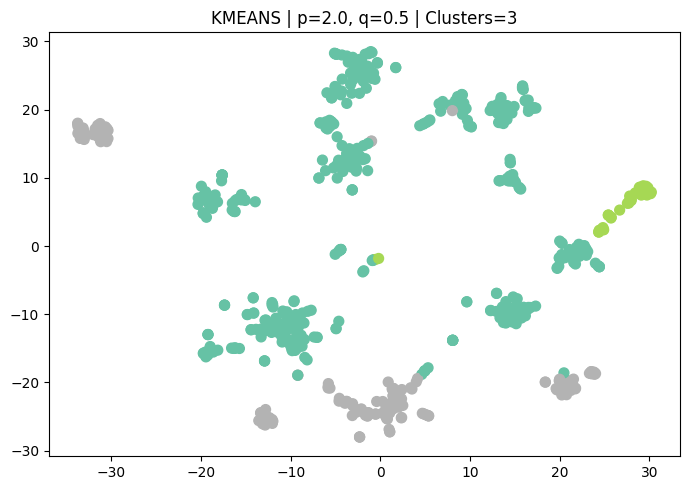

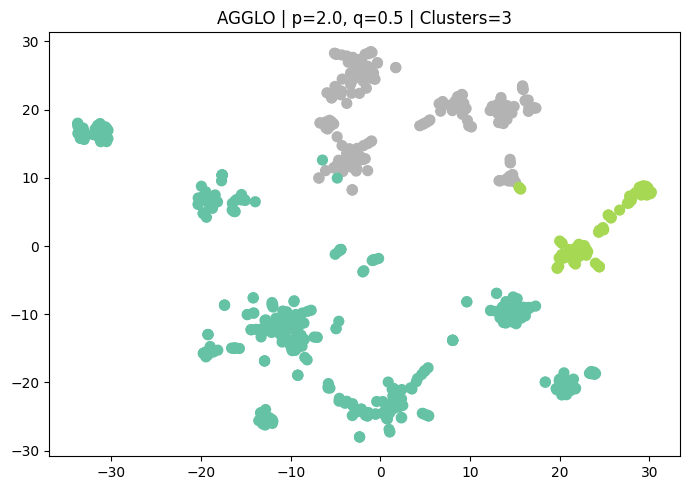

c:\Users\Pablo\OneDrive\Documentos\Estudios\DATCOM\Trabajo Fin de Máster\App\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Pablo\OneDrive\Documentos\Estudios\DATCOM\Trabajo Fin de Máster\App\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


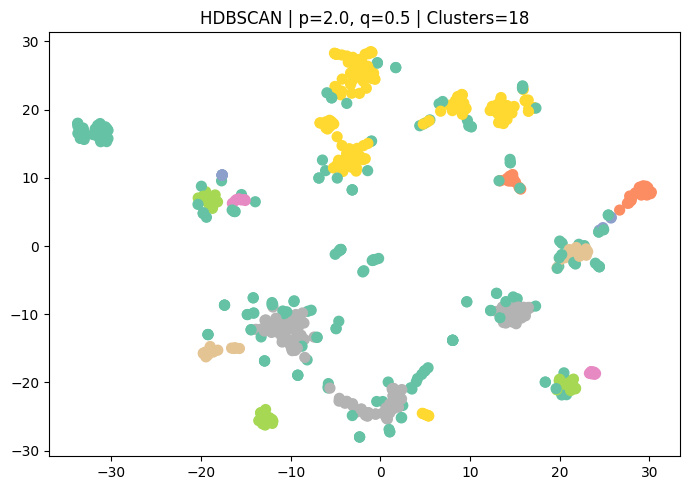

Procesando configuración: p=1.0, q=0.5, walk_length=30


Computing transition probabilities: 100%|██████████| 635/635 [00:00<00:00, 1241.88it/s]


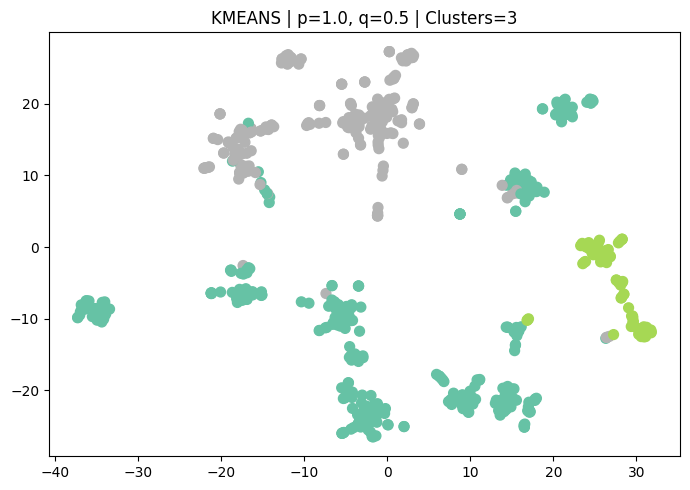

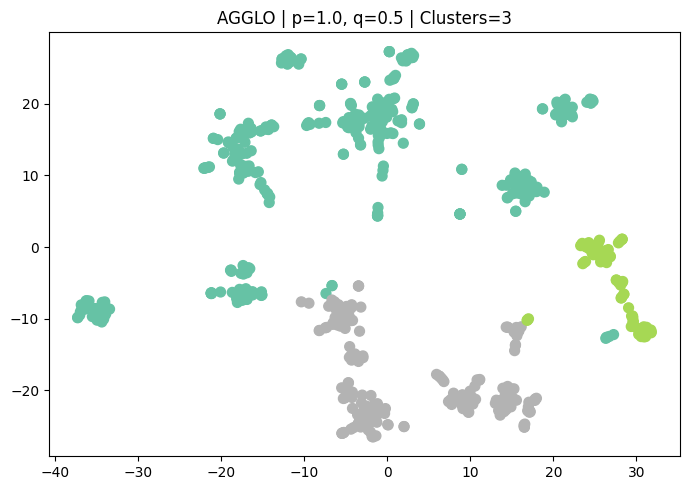

c:\Users\Pablo\OneDrive\Documentos\Estudios\DATCOM\Trabajo Fin de Máster\App\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Pablo\OneDrive\Documentos\Estudios\DATCOM\Trabajo Fin de Máster\App\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


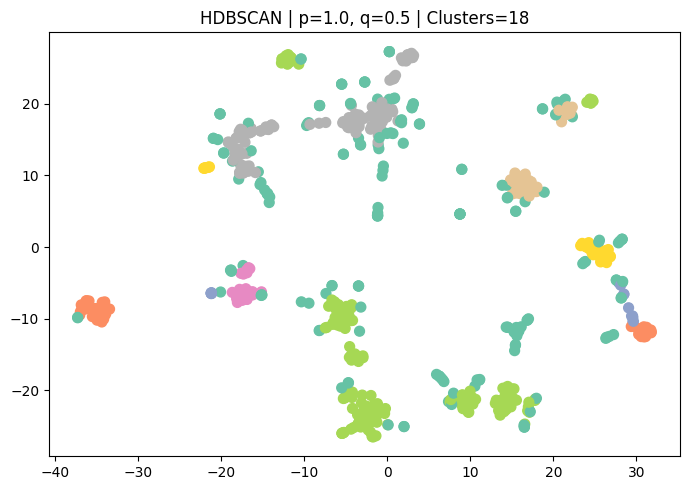

Procesando configuración: p=1.0, q=1.0, walk_length=10


Computing transition probabilities: 100%|██████████| 635/635 [00:00<00:00, 1356.79it/s]


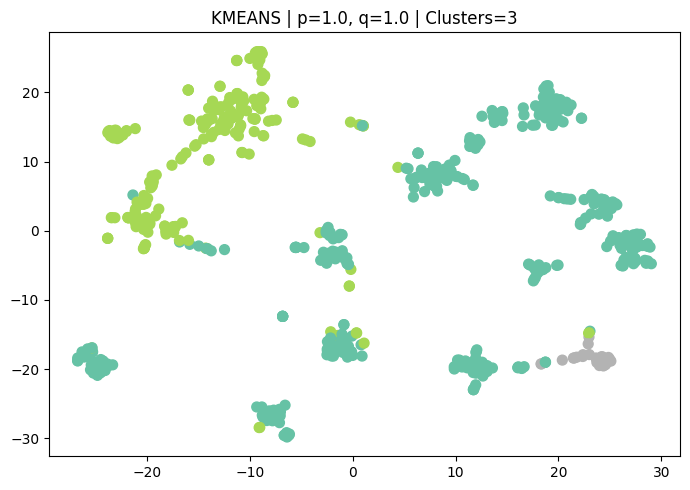

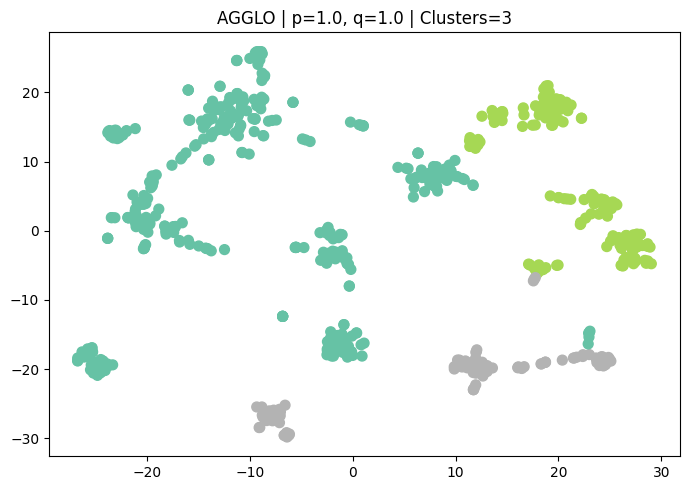

c:\Users\Pablo\OneDrive\Documentos\Estudios\DATCOM\Trabajo Fin de Máster\App\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Pablo\OneDrive\Documentos\Estudios\DATCOM\Trabajo Fin de Máster\App\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


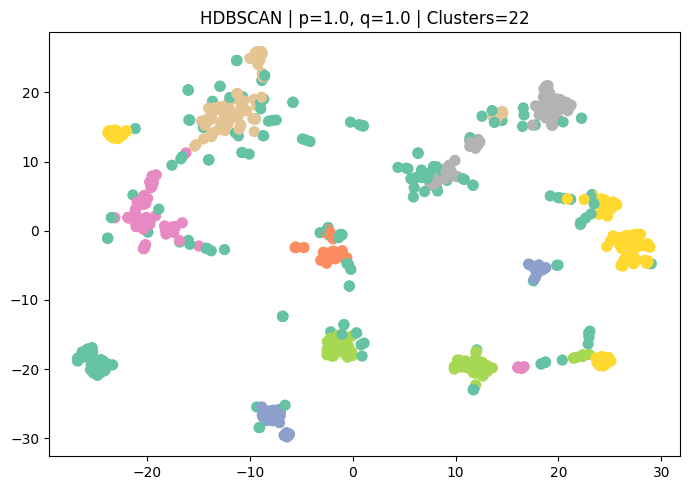

Procesando configuración: p=0.5, q=2.0, walk_length=20


Computing transition probabilities: 100%|██████████| 635/635 [00:00<00:00, 1291.26it/s]


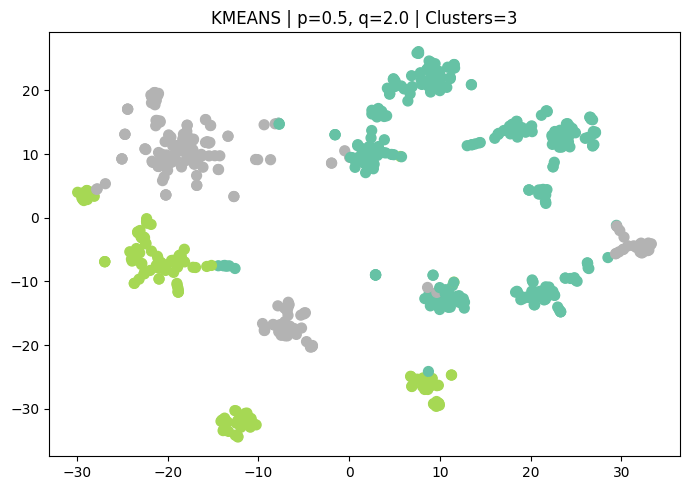

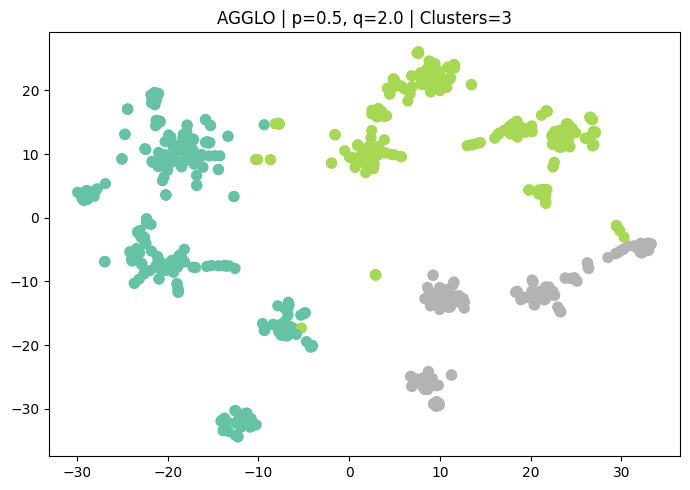

c:\Users\Pablo\OneDrive\Documentos\Estudios\DATCOM\Trabajo Fin de Máster\App\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Pablo\OneDrive\Documentos\Estudios\DATCOM\Trabajo Fin de Máster\App\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


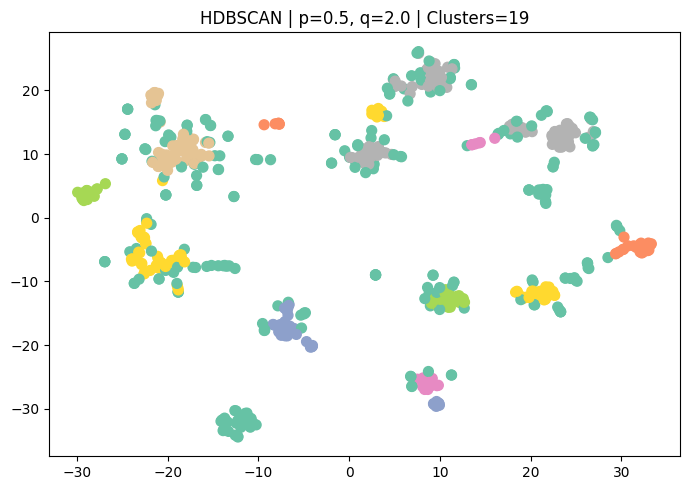

Procesando configuración: p=2.0, q=0.5, walk_length=20


Computing transition probabilities: 100%|██████████| 635/635 [00:00<00:00, 1204.33it/s]


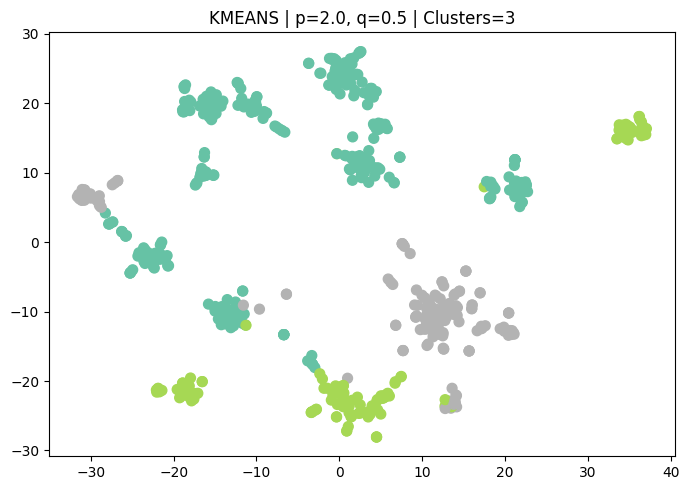

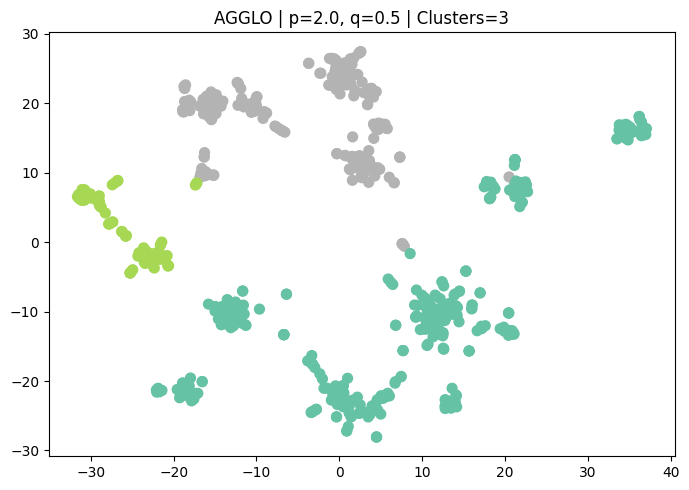

c:\Users\Pablo\OneDrive\Documentos\Estudios\DATCOM\Trabajo Fin de Máster\App\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Pablo\OneDrive\Documentos\Estudios\DATCOM\Trabajo Fin de Máster\App\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


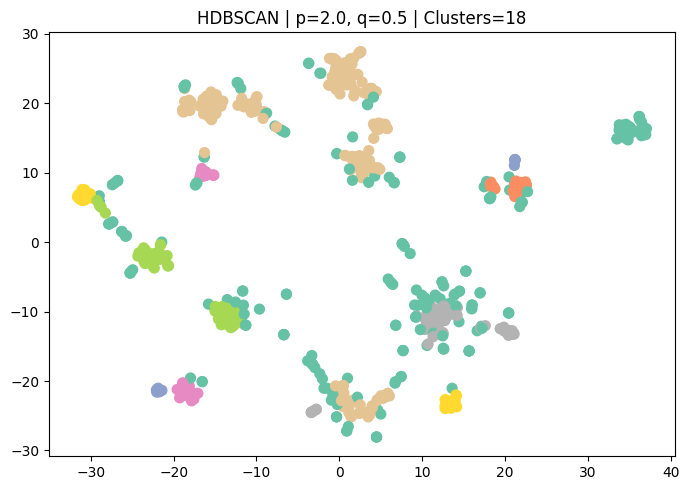

Procesando configuración: p=1.0, q=0.5, walk_length=30


Computing transition probabilities: 100%|██████████| 635/635 [00:00<00:00, 1310.16it/s]


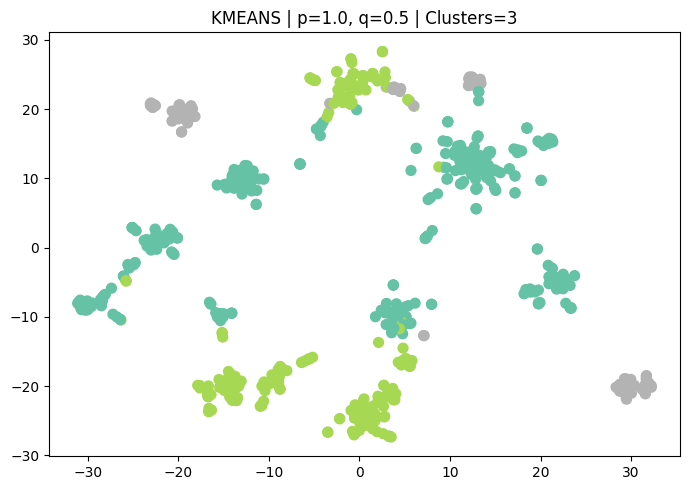

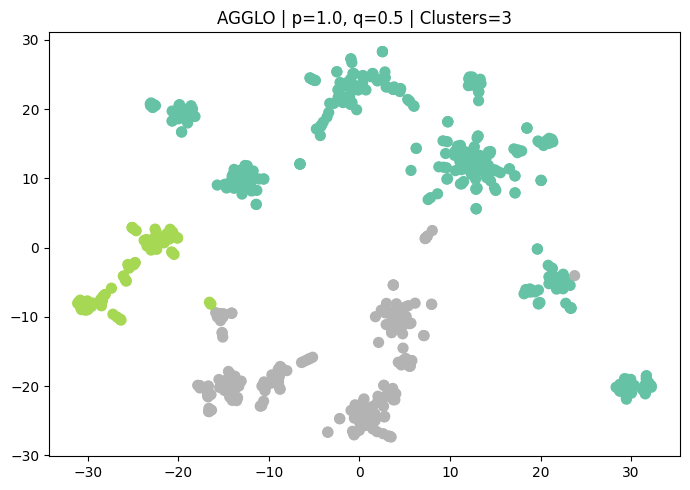

c:\Users\Pablo\OneDrive\Documentos\Estudios\DATCOM\Trabajo Fin de Máster\App\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Pablo\OneDrive\Documentos\Estudios\DATCOM\Trabajo Fin de Máster\App\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


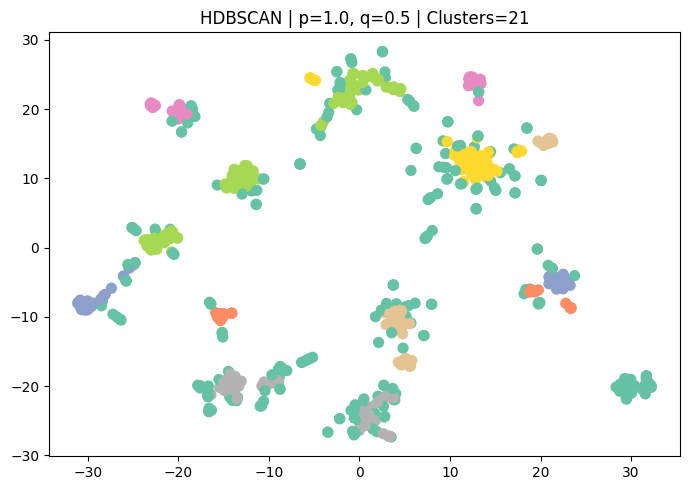

Procesando configuración: p=1.0, q=1.0, walk_length=20


Computing transition probabilities: 100%|██████████| 635/635 [00:00<00:00, 1260.47it/s]


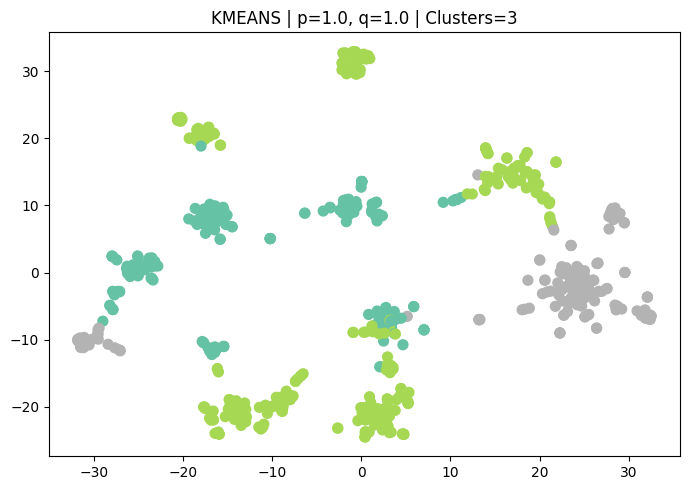

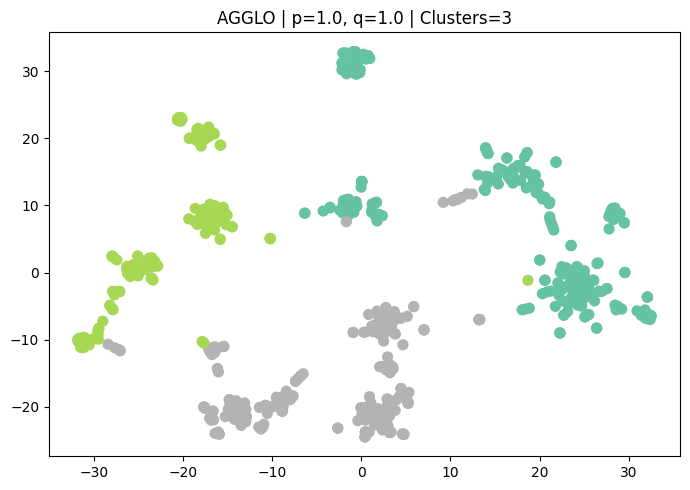

c:\Users\Pablo\OneDrive\Documentos\Estudios\DATCOM\Trabajo Fin de Máster\App\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Pablo\OneDrive\Documentos\Estudios\DATCOM\Trabajo Fin de Máster\App\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


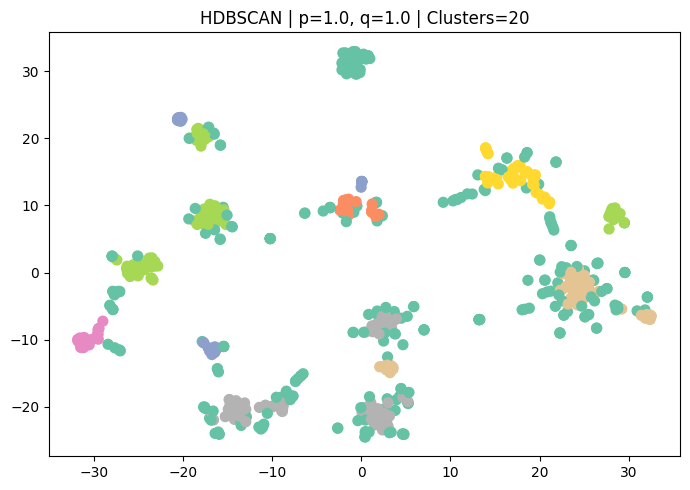

Procesando configuración: p=0.25, q=2.0, walk_length=30


Computing transition probabilities: 100%|██████████| 635/635 [00:00<00:00, 1181.81it/s]


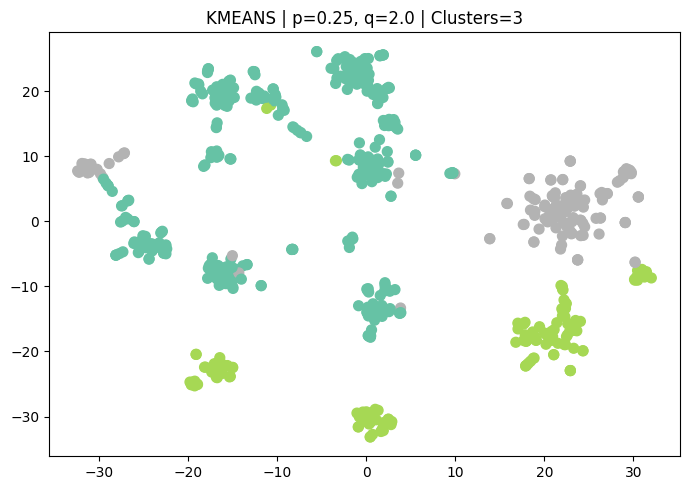

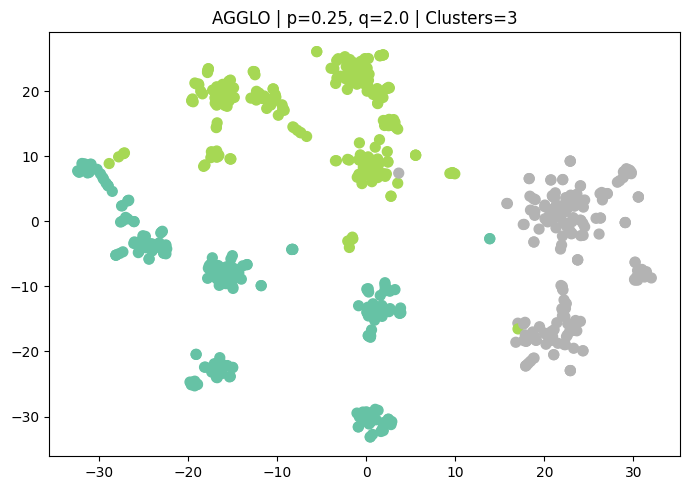

c:\Users\Pablo\OneDrive\Documentos\Estudios\DATCOM\Trabajo Fin de Máster\App\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Pablo\OneDrive\Documentos\Estudios\DATCOM\Trabajo Fin de Máster\App\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


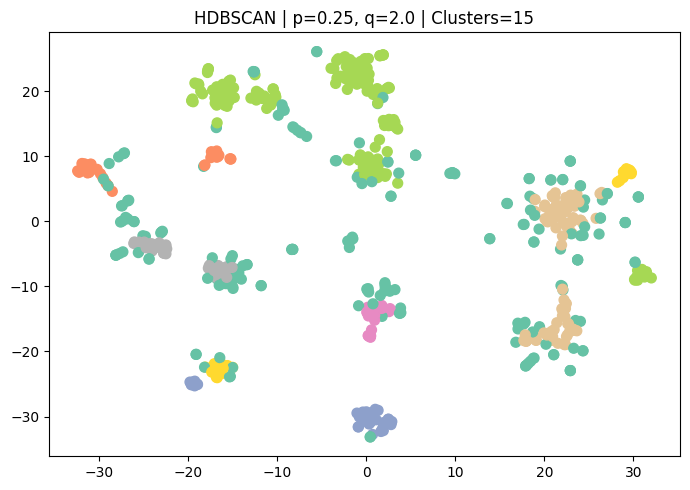

       p    q  walk_length   method  n_clusters  silhouette  calinski    ARI
13  1.00  1.0           10    agglo           3       0.152      78.5  0.569
16  0.50  2.0           20    agglo           3       0.131      68.0  0.563
25  1.00  1.0           20    agglo           3       0.127      70.5  0.533
4   0.50  2.0           20    agglo           3       0.132      73.7  0.421
28  0.25  2.0           30    agglo           3       0.112      63.5  0.403
1   1.00  1.0           10    agglo           3       0.146      76.8  0.396
19  2.00  0.5           20    agglo           3       0.133      77.0  0.389
22  1.00  0.5           30    agglo           3       0.133      77.6  0.386
10  1.00  0.5           30    agglo           3       0.150      89.1  0.369
7   2.00  0.5           20    agglo           3       0.150      88.0  0.366
0   1.00  1.0           10   kmeans           3       0.138      76.8  0.234
21  1.00  0.5           30   kmeans           3       0.106      56.3  0.229

In [30]:
import pandas as pd
import numpy as np
from node2vec import Node2Vec
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import hdbscan

# === 2. Definir parámetros para Node2Vec
param_sets = [
    {"dimensions": 32, "walk_length": 10, "num_walks": 50,  "p": 1.0, "q": 1.0},
    {"dimensions": 32, "walk_length": 20, "num_walks": 100, "p": 0.5, "q": 2.0},
    {"dimensions": 32, "walk_length": 20, "num_walks": 100, "p": 2.0, "q": 0.5},
    {"dimensions": 32, "walk_length": 30, "num_walks": 100, "p": 1.0, "q": 0.5},

    {"dimensions": 64, "walk_length": 10, "num_walks": 50,  "p": 1.0, "q": 1.0},
    {"dimensions": 64, "walk_length": 20, "num_walks": 100, "p": 0.5, "q": 2.0},
    {"dimensions": 64, "walk_length": 20, "num_walks": 100, "p": 2.0, "q": 0.5},
    {"dimensions": 64, "walk_length": 30, "num_walks": 100, "p": 1.0, "q": 0.5},

    {"dimensions": 128, "walk_length": 20, "num_walks": 100, "p": 1.0, "q": 1.0},
    {"dimensions": 128, "walk_length": 30, "num_walks": 100, "p": 0.25, "q": 2.0},
]

# === 3. Embeddings y clustering
resultados = []

for params in param_sets:
    print(f"Procesando configuración: p={params['p']}, q={params['q']}, walk_length={params['walk_length']}")
    
    # 1. Crear embeddings con tu clase
    transformer = Node2VecTransformer(
        dimensions=params["dimensions"],
        walk_length=params["walk_length"],
        num_walks=params["num_walks"],
        p=params["p"],
        q=params["q"]
    )
    transformer.fit(sorted_nodes)  # No necesita y
    X = transformer.transform(sorted_nodes)

    labels = [G_sub.nodes[n]['departament'] for n in sorted_nodes]

    encoder = LabelEncoder()
    y_true = encoder.fit_transform(labels)

    # === 4. Clustering con varios algoritmos
    clustering_algos = {
        "kmeans": KMeans(n_clusters=3, random_state=42),
        "agglo": AgglomerativeClustering(n_clusters=3),
        "hdbscan": hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean')
    }

    for method, model_clust in clustering_algos.items():
        try:
            y_pred = model_clust.fit_predict(X)
            n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)

            # Evaluar sólo si hay más de 1 cluster
            if n_clusters > 1:
                silhouette = silhouette_score(X, y_pred)
                calinski = calinski_harabasz_score(X, y_pred)
                ari = adjusted_rand_score(y_true, y_pred)
            else:
                silhouette = calinski = ari = -1

            # Visualizar con TSNE
            X_proj = TSNE(n_components=2, random_state=42).fit_transform(X)
            plt.figure(figsize=(7,5))
            plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y_pred, cmap="Set2", s=50)
            plt.title(f"{method.upper()} | p={params['p']}, q={params['q']} | Clusters={n_clusters}")
            plt.tight_layout()
            plt.show()

            # Guardar resultado
            resultados.append({
                "p": params["p"],
                "q": params["q"],
                "walk_length": params["walk_length"],
                "method": method,
                "n_clusters": n_clusters,
                "silhouette": round(silhouette, 3),
                "calinski": round(calinski, 1),
                "ARI": round(ari, 3)
            })

        except Exception as e:
            print(f"Error con {method}: {e}")

# === 5. Mostrar resumen
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by="ARI", ascending=False)
print(df_resultados)


Los resultados obtenidos muestran que el algoritmo de Agglomerative Clustering es el más eficaz para identificar las comunidades reales en la red de coautoría del IPBLN. Con configuraciones de caminatas aleatorias como p=1, q=1 y walk_length=10, se alcanzó un índice ARI de 0.569, indicando una alta concordancia con los departamentos asignados. Esta técnica supera claramente a KMeans y HDBSCAN, tanto en ARI como en la estabilidad del número de clústeres generados, ajustándose al número real de clases.

Aunque HDBSCAN logra los valores más altos de Silhouette Score (indicando buena cohesión interna), su rendimiento en ARI es bajo, lo que sugiere que detecta subestructuras internas más que replicar los departamentos. Por tanto, para tareas supervisadas o de evaluación con etiquetas conocidas, Agglomerative con configuraciones estándar de Node2Vec demuestra ser la opción más robusta.

### TASK 3: CLASSIFICATION

Use your preferred R or Python libraries to train a classifier to predict the disease category based on the embeddings for the disease network.

Your contributions will be evaluated based on:
- Evaluation of the results for different embeddings (RWs and 2nd order RWs, different setting of parameters, etc)
- Use of different classification algorithms and their parameterizations.
- Use of rigorous evaluation metrics.
- Use of feature selection techniques.

Students who need to submit an assignment for this week of the course must complete both challenges and submit documentation (notebook or PDF) describing in detail the proposed methodology, the results, and all the steps taken to address each challenge. More information available on PRADO.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import make_scorer, accuracy_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# === Etiquetas
nodos["author_id"] = nodos["author_id"].astype(str)
sorted_nodes = sorted(G_sub.nodes())
labels = [G_sub.nodes[n]["departament"] for n in sorted_nodes]

encoder = LabelEncoder()
y = encoder.fit_transform(labels)

# === Train/Test split
X_train_nodes, X_test_nodes, y_train, y_test = train_test_split(
    sorted_nodes, y, test_size=0.2, stratify=y, random_state=42
)

# === Pipeline
pipe = Pipeline([
    ('n2v', Node2VecTransformer()),
    ('select', SelectKBest(score_func=f_classif)),
    ('clf', LogisticRegression(max_iter=1000))
])

# === Grid de parámetros
param_grid = [
    {
        'n2v__dimensions': [32, 64],
        'n2v__walk_length': [10, 20],
        'n2v__num_walks': [50, 100],
        'n2v__p': [1],
        'n2v__q': [1],
        'select__k': [20, 'all'],
        'clf': [LogisticRegression(max_iter=1000)]
    },
    {
        'n2v__dimensions': [32, 64],
        'n2v__walk_length': [10, 20],
        'n2v__num_walks': [50, 100],
        'n2v__p': [1],
        'n2v__q': [1],
        'select__k': [20, 'all'],
        'clf': [RandomForestClassifier()]
    },
    {
        'n2v__dimensions': [32, 64],
        'n2v__walk_length': [10, 20],
        'n2v__num_walks': [50, 100],
        'n2v__p': [1],
        'n2v__q': [1],
        'select__k': [20, 'all'],
        'clf': [MLPClassifier(max_iter=1000)]
    },
    {
        'n2v__dimensions': [32, 64],
        'n2v__walk_length': [10, 20],
        'n2v__num_walks': [50, 100],
        'n2v__p': [1],
        'n2v__q': [1],
        'select__k': [20, 'all'],
        'clf': [LinearSVC()]
    }
]

# === GridSearchCV
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=make_scorer(f1_score, average='macro'),
    cv=2,
    verbose=2,
    n_jobs=8
)

grid.fit(X_train_nodes, y_train)

# === Resultados
print("Mejores parámetros:", grid.best_params_)
print("Mejor F1 macro en CV:", round(grid.best_score_, 3))

# === Evaluar en test
y_pred = grid.predict(X_test_nodes)
print("=== Evaluación en conjunto de test ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("F1-score macro:", round(f1_score(y_test, y_pred, average="macro"), 3))
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


Fitting 2 folds for each of 64 candidates, totalling 128 fits


Computing transition probabilities: 100%|██████████| 635/635 [00:00<00:00, 1820.81it/s]


Mejores parámetros: {'clf': MLPClassifier(max_iter=1000), 'n2v__dimensions': 64, 'n2v__num_walks': 50, 'n2v__p': 1, 'n2v__q': 1, 'n2v__walk_length': 20, 'select__k': 'all'}
Mejor F1 macro en CV: 0.965
=== Evaluación en conjunto de test ===
Accuracy: 0.929
F1-score macro: 0.924
                                     precision    recall  f1-score   support

     Biología celular e inmunología       0.93      0.95      0.94        66
                 Biología molecular       0.91      0.94      0.93        33
Bioquímica y farmacología molecular       0.96      0.86      0.91        28

                           accuracy                           0.93       127
                          macro avg       0.93      0.92      0.92       127
                       weighted avg       0.93      0.93      0.93       127



Los resultados obtenidos en la clasificación del departamento de los autores a partir de los embeddings de la red de coautoría del IPBLN muestran un rendimiento excelente. La mejor configuración encontrada mediante búsqueda en rejilla (GridSearchCV) corresponde a un modelo MLPClassifier (perceptrón multicapa) entrenado con embeddings de 64 dimensiones, generados mediante Node2Vec con 50 random walks de longitud 20, y sin reducción del número de características (select__k='all'). Este modelo alcanzó un F1-score macro de 0.965 en validación cruzada, lo que refleja una alta capacidad generalizadora.

En el conjunto de test, el rendimiento se mantuvo alto con un accuracy del 92.9% y un F1-score macro de 0.924, lo que indica que el modelo no sólo clasifica con precisión, sino también de manera equilibrada entre las tres clases. Las clases "Biología celular e inmunología" y "Biología molecular" obtuvieron valores de f1 superiores al 0.93, mientras que "Bioquímica y farmacología molecular" mostró un rendimiento algo inferior en recall (0.86), lo que sugiere que esta clase fue la más difícil de identificar correctamente. En conjunto, los resultados confirman que la combinación de embeddings obtenidos mediante Random Walks con un clasificador MLP y selección de características adecuada permite modelar de forma efectiva la estructura colaborativa de los investigadores y predecir su departamento de pertenencia.